**Importação do dataset**


[Parkinsons](https://archive.ics.uci.edu/dataset/174/parkinsons)

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

parkinson = fetch_ucirepo(id=174)

data = parkinson.data.original

# Caso já queria separar as features da target
#X = parkinson.data.features

#y = parkinson.data.targets

print(parkinson.metadata)

print(parkinson.variables)

{'uci_id': 174, 'name': 'Parkinsons', 'repository_url': 'https://archive.ics.uci.edu/dataset/174/parkinsons', 'data_url': 'https://archive.ics.uci.edu/static/public/174/data.csv', 'abstract': "Oxford Parkinson's Disease Detection Dataset", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 197, 'num_features': 22, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['status'], 'index_col': ['name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C59C74', 'creators': ['Max Little'], 'intro_paper': {'ID': 385, 'type': 'NATIVE', 'title': 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 'authors': 'Max A. Little, P. McSharry, S. Roberts, D. Costello, I. Moroz', 'venue': 'BioMedical Engineering OnLine', 'year': 2007, 'journal': None, 'DOI': '10.1186/1475-925X-6-23', 'URL

In [ ]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt
import pytensor.tensor as tt
import pytensor.tensor as at
import warnings
warnings.filterwarnings('ignore')

# **EDA (Análise exploratória de dados)**

In [ ]:
display(data)

name  MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter  MDVP:Jitter.1  \
0    phon_R01_S01_1  119.992   157.302    74.997      0.00784        0.00007   
1    phon_R01_S01_2  122.400   148.650   113.819      0.00968        0.00008   
2    phon_R01_S01_3  116.682   131.111   111.555      0.01050        0.00009   
3    phon_R01_S01_4  116.676   137.871   111.366      0.00997        0.00009   
4    phon_R01_S01_5  116.014   141.781   110.655      0.01284        0.00011   
..              ...      ...       ...       ...          ...            ...   
190  phon_R01_S50_2  174.188   230.978    94.261      0.00459        0.00003   
191  phon_R01_S50_3  209.516   253.017    89.488      0.00564        0.00003   
192  phon_R01_S50_4  174.688   240.005    74.287      0.01360        0.00008   
193  phon_R01_S50_5  198.764   396.961    74.904      0.00740        0.00004   
194  phon_R01_S50_6  214.289   260.277    77.973      0.00567        0.00003   

     MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  Shimmer:DDA      NHR  \
0     0.00370   0.00554     0.01109       0.04374  ...      0.06545  0.02211   
1     0.00465   0.00696     0.01394       0.06134  ...      0.09403  0.01929   
2     0.00544   0.00781     0.01633       0.05233  ...      0.08270  0.01309   
3     0.00502   0.00698     0.01505       0.05492  ...      0.08771  0.01353   
4     0.00655   0.00908     0.01966       0.06425  ...      0.10470  0.01767   
..        ...       ...         ...           ...  ...          ...      ...   
190   0.00263   0.00259     0.00790       0.04087  ...      0.07008  0.02764   
191   0.00331   0.00292     0.00994       0.02751  ...      0.04812  0.01810   
192   0.00624   0.00564     0.01873       0.02308  ...      0.03804  0.10715   
193   0.00370   0.00390     0.01109       0.02296  ...      0.03794  0.07223   
194   0.00295   0.00317     0.00885       0.01884  ...      0.03078  0.04398   

        HNR  status      RPDE       DFA   spread1   spread2        D2  \
0    21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1    19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2    20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3    20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4    19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   
..      ...     ...       ...       ...       ...       ...       ...   
190  19.517       0  0.448439  0.657899 -6.538586  0.121952  2.657476   
191  19.147       0  0.431674  0.683244 -6.195325  0.129303  2.784312   
192  17.883       0  0.407567  0.655683 -6.787197  0.158453  2.679772   
193  19.020       0  0.451221  0.643956 -6.744577  0.207454  2.138608   
194  21.209       0  0.462803  0.664357 -5.724056  0.190667  2.555477   

          PPE  
0    0.284654  
1    0.368674  
2    0.332634  
3    0.368975  
4    0.410335  
..        ...  
190  0.133050  
191  0.168895  
192  0.131728  
193  0.123306  
194  0.148569  

[195 rows x 24 columns]

In [ ]:
# Excluindo o ID
data = data.drop(['name'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MDVP:Fo         195 non-null    float64
 1   MDVP:Fhi        195 non-null    float64
 2   MDVP:Flo        195 non-null    float64
 3   MDVP:Jitter     195 non-null    float64
 4   MDVP:Jitter.1   195 non-null    float64
 5   MDVP:RAP        195 non-null    float64
 6   MDVP:PPQ        195 non-null    float64
 7   Jitter:DDP      195 non-null    float64
 8   MDVP:Shimmer    195 non-null    float64
 9   MDVP:Shimmer.1  195 non-null    float64
 10  Shimmer:APQ3    195 non-null    float64
 11  Shimmer:APQ5    195 non-null    float64
 12  MDVP:APQ        195 non-null    float64
 13  Shimmer:DDA     195 non-null    float64
 14  NHR             195 non-null    float64
 15  HNR             195 non-null    float64
 16  status          195 non-null    int64  
 17  RPDE            195 non-null    flo

In [ ]:
data.describe()

MDVP:Fo    MDVP:Fhi    MDVP:Flo  MDVP:Jitter  MDVP:Jitter.1  \
count  195.000000  195.000000  195.000000   195.000000     195.000000   
mean   154.228641  197.104918  116.324631     0.006220       0.000044   
std     41.390065   91.491548   43.521413     0.004848       0.000035   
min     88.333000  102.145000   65.476000     0.001680       0.000007   
25%    117.572000  134.862500   84.291000     0.003460       0.000020   
50%    148.790000  175.829000  104.315000     0.004940       0.000030   
75%    182.769000  224.205500  140.018500     0.007365       0.000060   
max    260.105000  592.030000  239.170000     0.033160       0.000260   

         MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer.1  ...  \
count  195.000000  195.000000  195.000000    195.000000      195.000000  ...   
mean     0.003306    0.003446    0.009920      0.029709        0.282251  ...   
std      0.002968    0.002759    0.008903      0.018857        0.194877  ...   
min      0.000680    0.000920    0.002040      0.009540        0.085000  ...   
25%      0.001660    0.001860    0.004985      0.016505        0.148500  ...   
50%      0.002500    0.002690    0.007490      0.022970        0.221000  ...   
75%      0.003835    0.003955    0.011505      0.037885        0.350000  ...   
max      0.021440    0.019580    0.064330      0.119080        1.302000  ...   

       Shimmer:DDA         NHR         HNR      status        RPDE  \
count   195.000000  195.000000  195.000000  195.000000  195.000000   
mean      0.046993    0.024847   21.885974    0.753846    0.498536   
std       0.030459    0.040418    4.425764    0.431878    0.103942   
min       0.013640    0.000650    8.441000    0.000000    0.256570   
25%       0.024735    0.005925   19.198000    1.000000    0.421306   
50%       0.038360    0.011660   22.085000    1.000000    0.495954   
75%       0.060795    0.025640   25.075500    1.000000    0.587562   
max       0.169420    0.314820   33.047000    1.000000    0.685151   

              DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

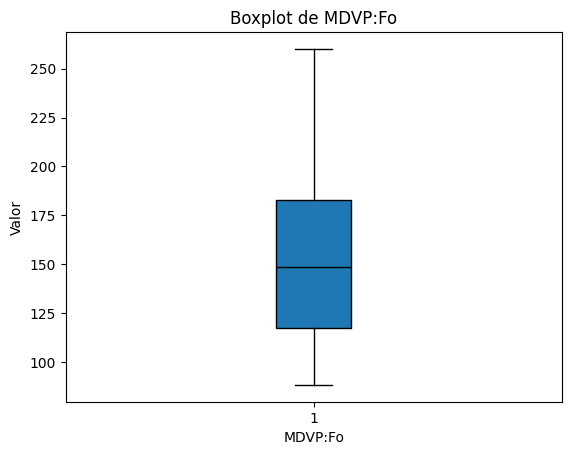

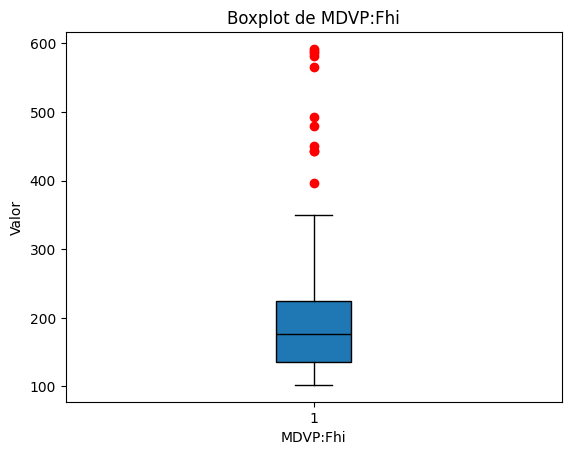

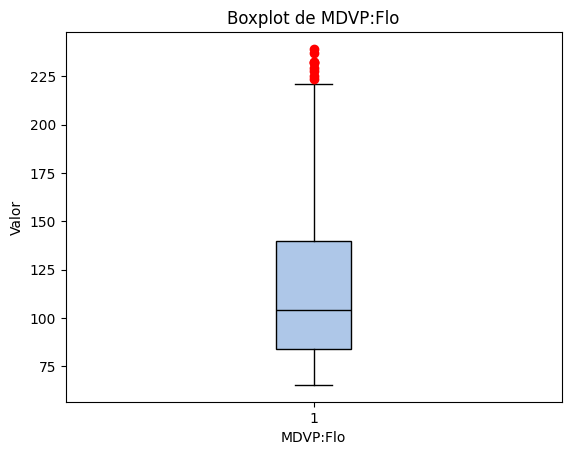

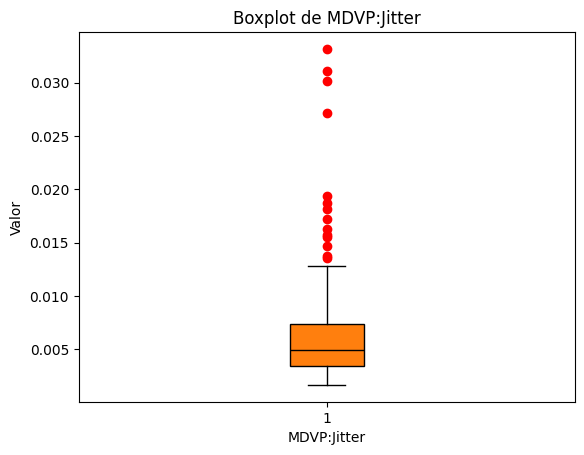

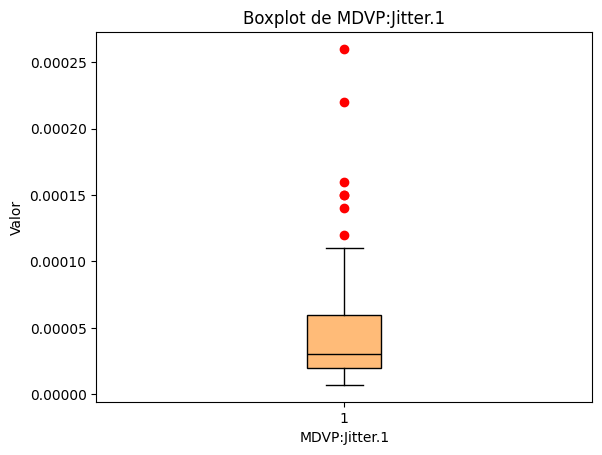

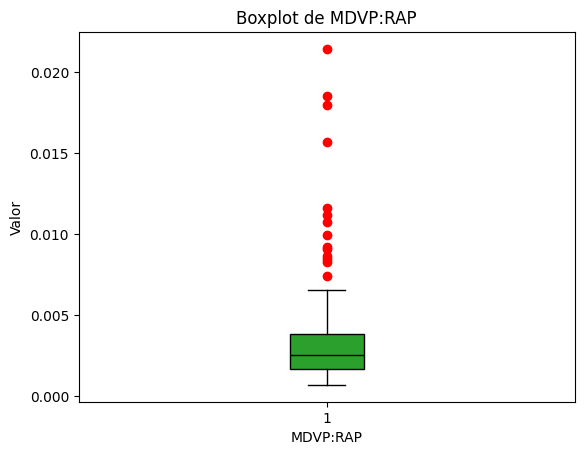

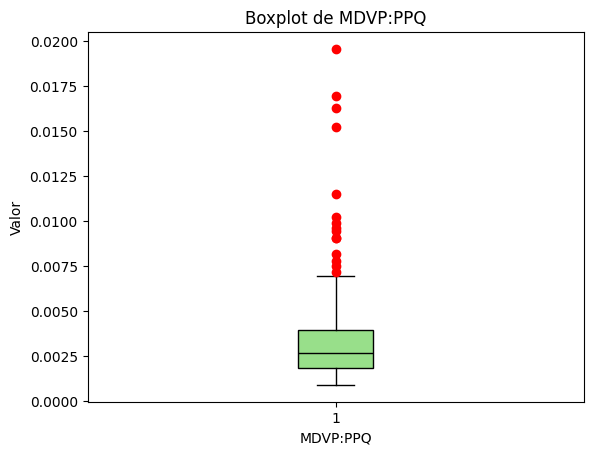

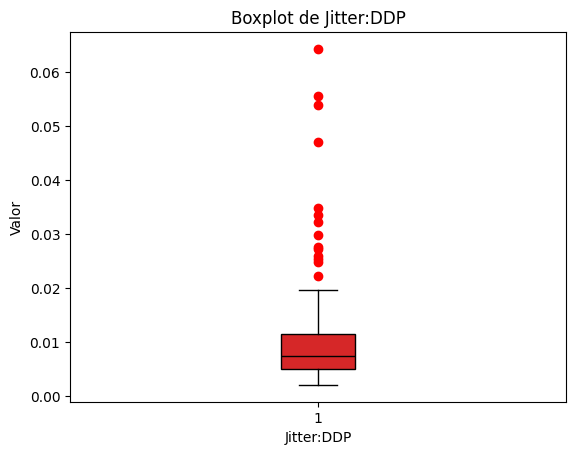

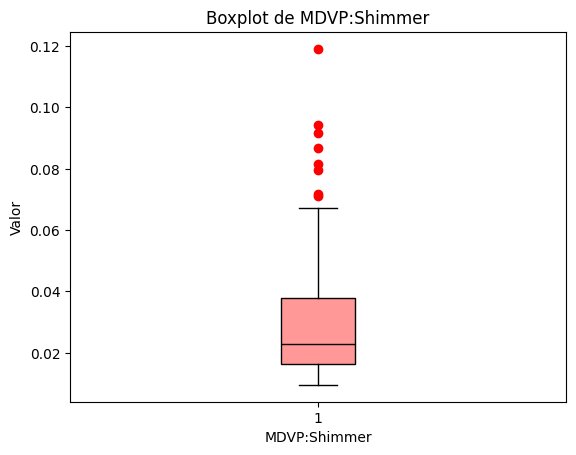

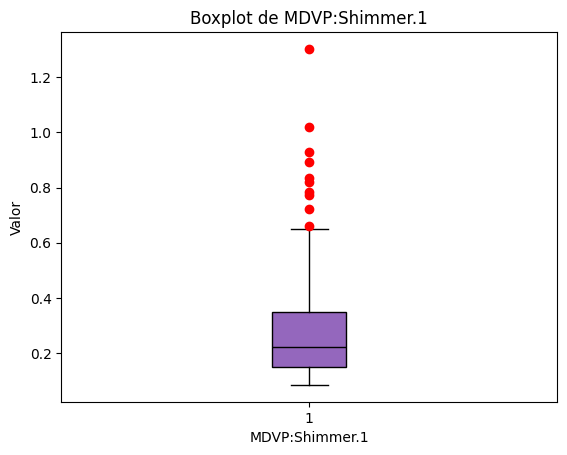

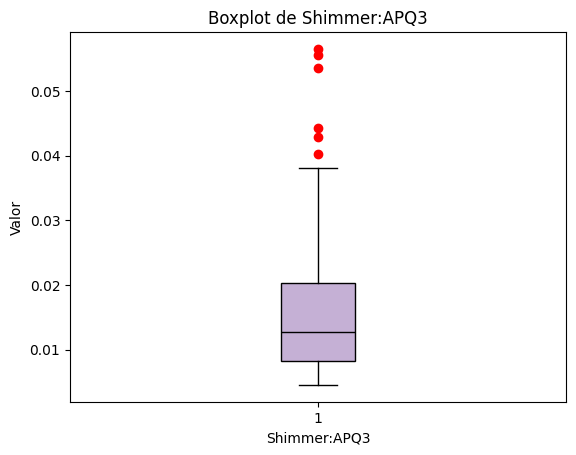

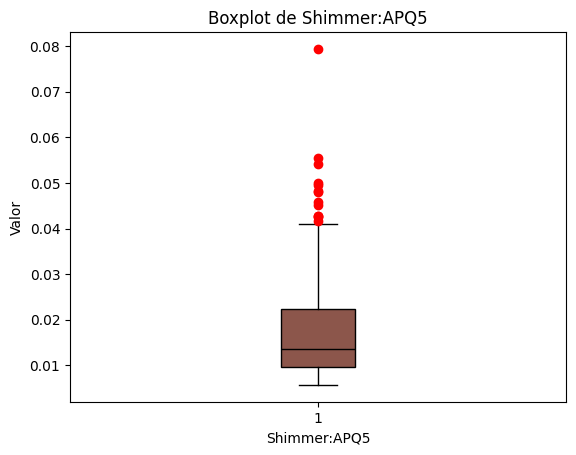

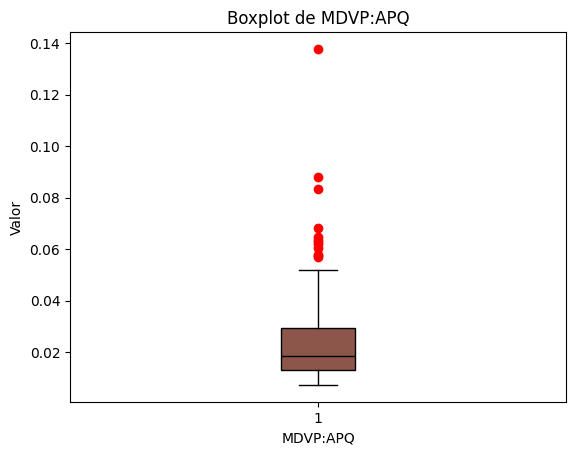

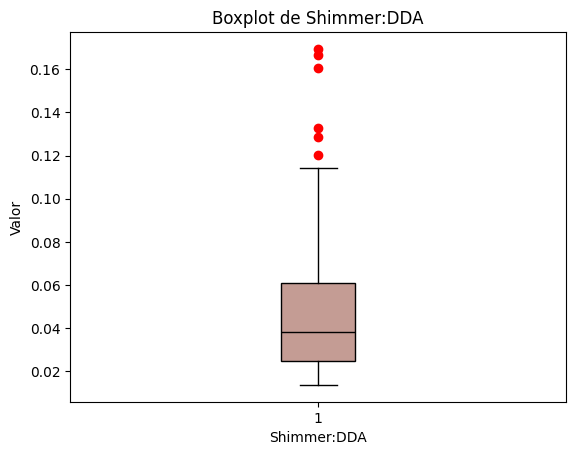

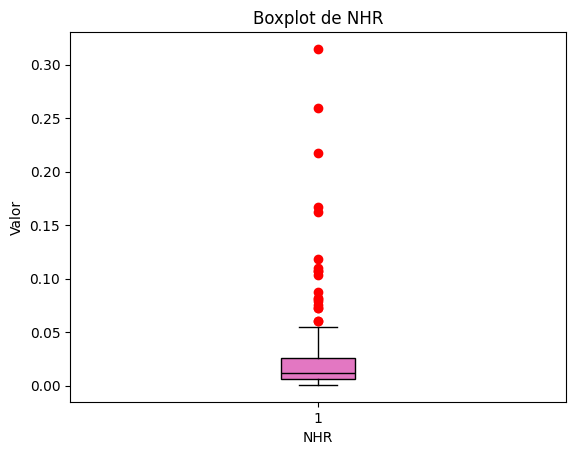

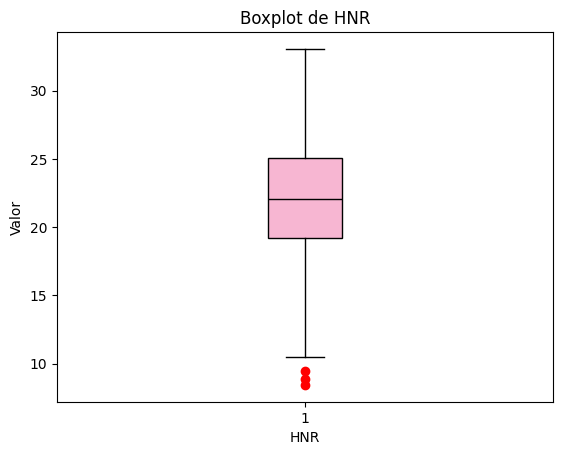

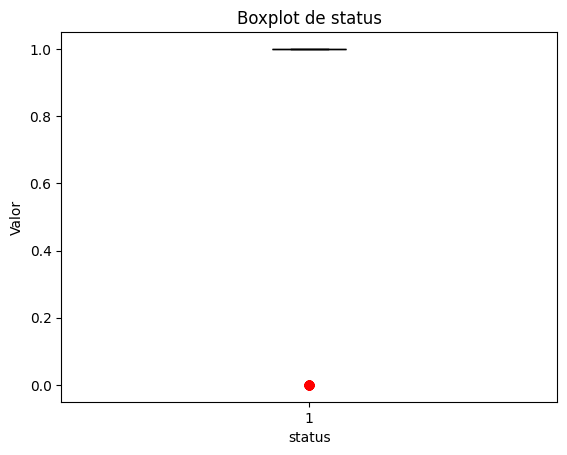

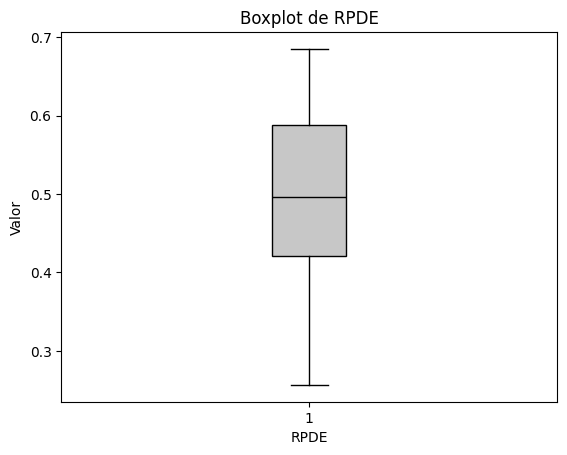

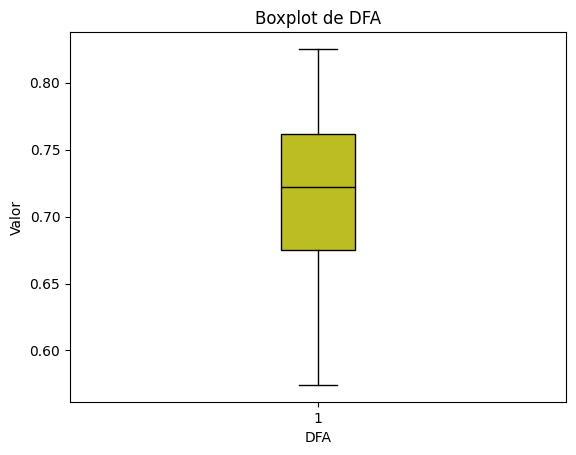

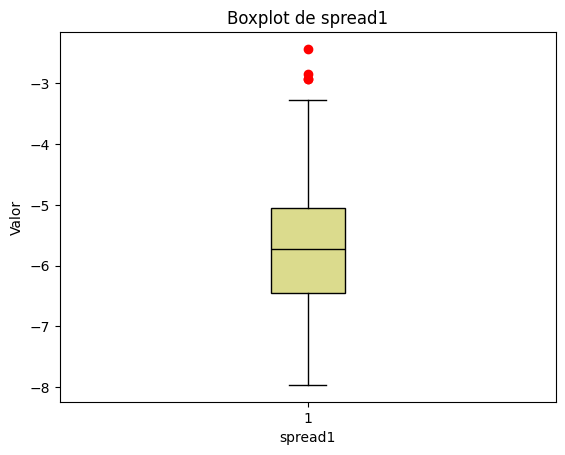

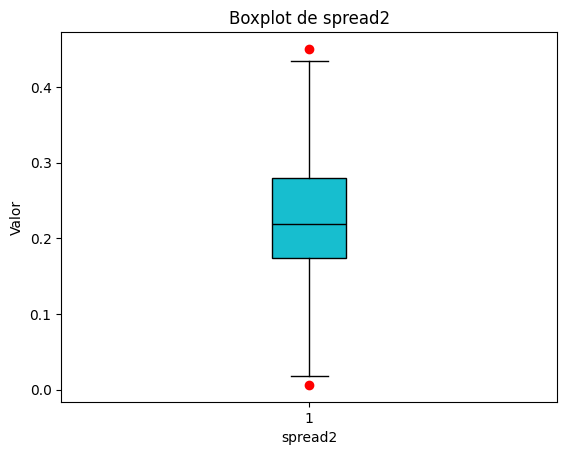

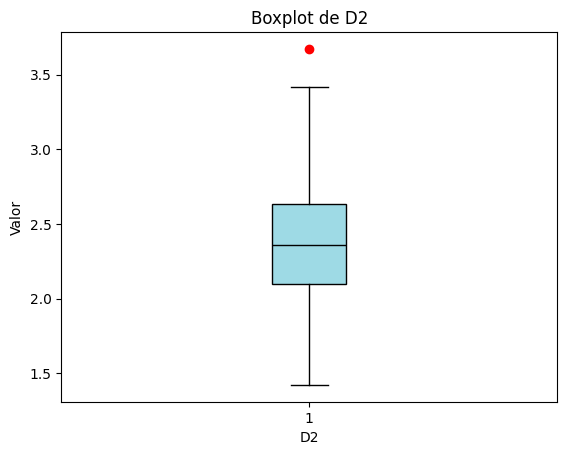

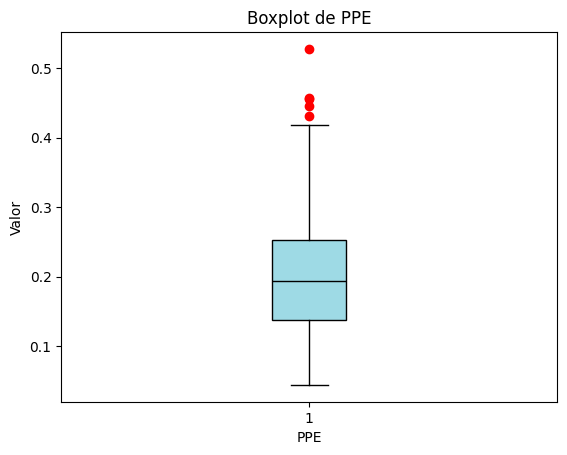

In [ ]:
cmap = plt.cm.get_cmap('tab20', len(data.columns))

for i, col in enumerate(data.columns):
    fig, ax = plt.subplots()
    bp = ax.boxplot(
        data[col],
        vert=True,
        patch_artist=True,
        flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='red')
    )

    color = cmap(i)
    for box in bp['boxes']:
        box.set(facecolor=color, edgecolor='black')
    for element in ['whiskers', 'caps', 'medians']:
        plt.setp(bp[element], color='black')

    ax.set_title(f'Boxplot de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Valor')
    plt.show()

Observamos a presença de diversos outliers na maioria das colunas, o que é importante ter em mente para que possamos mitigar ou tratar esses valores antes de aplicarmos os modelos.

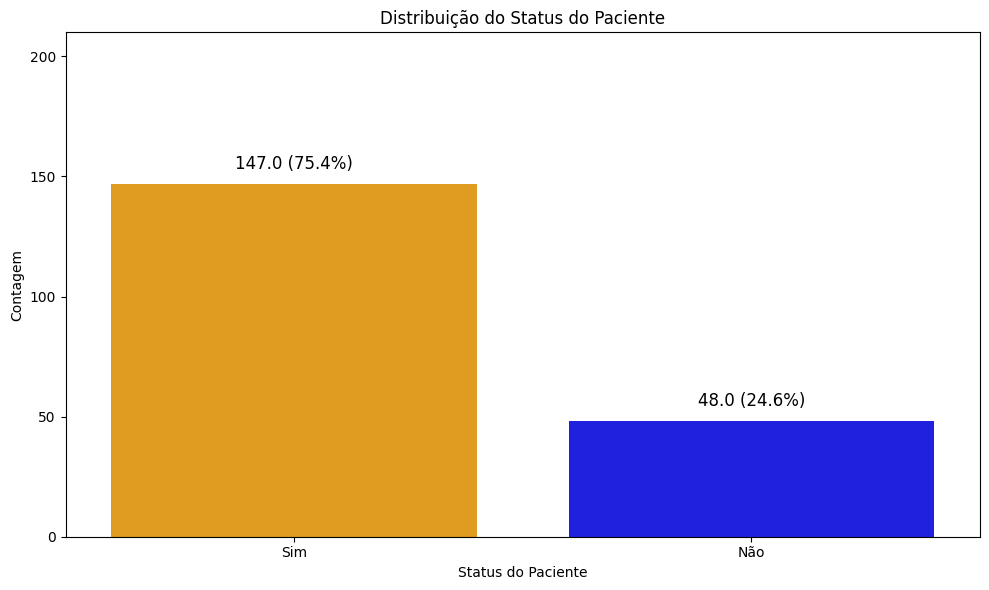

In [ ]:
data['status_nome'] = data['status'].map({0: 'Não', 1: 'Sim'})

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='status_nome',
    data=data,
    palette={'Não':'blue', 'Sim':'orange'}
)

plt.title('Distribuição do Status do Paciente')
plt.xlabel('Status do Paciente')
plt.ylabel('Contagem')
plt.ylim(0, 210)
plt.yticks(np.arange(0, 201, 50))
total = len(data)

for p in ax.patches:
    count = p.get_height()
    pct   = 100 * count / total
    label = f'{count} ({pct:.1f}%)'

    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2, count),
        ha='center', va='bottom',
        fontsize=12,
        color='black',
        xytext=(0, 8),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

O gráfico mostra, de forma clara, que a grande maioria das amostras no conjunto de dados corresponde a pacientes com Parkinson (“Sim”), totalizando 147 registros, o que equivale a 75,4% do total. Já o grupo de controle (“Não”), composto por indivíduos saudáveis, representa apenas 48 observações, ou 24,6% dos casos.

Essa distribuição evidencia um desbalanceamento entre as classes, há cerca de três vezes mais pacientes com Parkinson do que controles saudáveis, isso pode afetar os modelos de tal modo que eles podem tender a "chutar" a classe majoritaria.

In [ ]:
#Separando a target das features
x_f = data.drop(['status','status_nome'], axis = 1)
y_t = data['status']
display(x_f)

MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter  MDVP:Jitter.1  MDVP:RAP  \
0    119.992   157.302    74.997      0.00784        0.00007   0.00370   
1    122.400   148.650   113.819      0.00968        0.00008   0.00465   
2    116.682   131.111   111.555      0.01050        0.00009   0.00544   
3    116.676   137.871   111.366      0.00997        0.00009   0.00502   
4    116.014   141.781   110.655      0.01284        0.00011   0.00655   
..       ...       ...       ...          ...            ...       ...   
190  174.188   230.978    94.261      0.00459        0.00003   0.00263   
191  209.516   253.017    89.488      0.00564        0.00003   0.00331   
192  174.688   240.005    74.287      0.01360        0.00008   0.00624   
193  198.764   396.961    74.904      0.00740        0.00004   0.00370   
194  214.289   260.277    77.973      0.00567        0.00003   0.00295   

     MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer.1  ...  MDVP:APQ  \
0     0.00554     0.01109       0.04374           0.426  ...   0.02971   
1     0.00696     0.01394       0.06134           0.626  ...   0.04368   
2     0.00781     0.01633       0.05233           0.482  ...   0.03590   
3     0.00698     0.01505       0.05492           0.517  ...   0.03772   
4     0.00908     0.01966       0.06425           0.584  ...   0.04465   
..        ...         ...           ...             ...  ...       ...   
190   0.00259     0.00790       0.04087           0.405  ...   0.02745   
191   0.00292     0.00994       0.02751           0.263  ...   0.01879   
192   0.00564     0.01873       0.02308           0.256  ...   0.01667   
193   0.00390     0.01109       0.02296           0.241  ...   0.01588   
194   0.00317     0.00885       0.01884           0.190  ...   0.01373   

     Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \
0        0.06545  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482   
1        0.09403  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590   
2        0.08270  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173   
3        0.08771  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147   
4        0.10470  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513   
..           ...      ...     ...       ...       ...       ...       ...   
190      0.07008  0.02764  19.517  0.448439  0.657899 -6.538586  0.121952   
191      0.04812  0.01810  19.147  0.431674  0.683244 -6.195325  0.129303   
192      0.03804  0.10715  17.883  0.407567  0.655683 -6.787197  0.158453   
193      0.03794  0.07223  19.020  0.451221  0.643956 -6.744577  0.207454   
194      0.03078  0.04398  21.209  0.462803  0.664357 -5.724056  0.190667   

           D2       PPE  
0    2.301442  0.284654  
1    2.486855  0.368674  
2    2.342259  0.332634  
3    2.405554  0.368975  
4    2.332180  0.410335  
..        ...       ...  
190  2.657476  0.133050  
191  2.784312  0.168895  
192  2.679772  0.131728  
193  2.138608  0.123306  
194  2.555477  0.148569  

[195 rows x 22 columns]

In [ ]:
display(y_t)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

**Iremos utilizar o RobustScaler para amenizar os outliers que vimos anteriormente nas features**

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

scaler = RobustScaler()

x_f_scaled_array = scaler.fit_transform(x_f)

x_f_scaled = pd.DataFrame(
    x_f_scaled_array,
    index=x_f.index,
    columns=x_f.columns
)
display(x_f_scaled)

MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter  MDVP:Jitter.1  MDVP:RAP  \
0   -0.441707 -0.207369 -0.526096     0.742638           1.00  0.551724   
1   -0.404773 -0.304210  0.170544     1.213828           1.25  0.988506   
2   -0.492477 -0.500520  0.129918     1.423816           1.50  1.351724   
3   -0.492569 -0.424857  0.126526     1.288092           1.50  1.158621   
4   -0.502723 -0.381093  0.113768     2.023047           2.00  1.862069   
..        ...       ...       ...          ...            ...       ...   
190  0.389558  0.617273 -0.180414    -0.089629           0.00  0.059770   
191  0.931423  0.863951 -0.266063     0.179257           0.00  0.372414   
192  0.397227  0.718310 -0.538836     2.217670           1.25  1.719540   
193  0.766508  2.475090 -0.527765     0.629962           0.25  0.551724   
194  1.004632  0.945211 -0.472693     0.186940           0.00  0.206897   

     MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer.1  ...  MDVP:APQ  \
0    1.360382    0.552147      0.971469        1.017370  ...  0.701593   
1    2.038186    0.989264      1.794668        2.009926  ...  1.557598   
2    2.443914    1.355828      1.373246        1.295285  ...  1.080882   
3    2.047733    1.159509      1.494387        1.468983  ...  1.192402   
4    3.050119    1.866564      1.930776        1.801489  ...  1.617034   
..        ...         ...           ...             ...  ...       ...   
190 -0.047733    0.062883      0.837231        0.913151  ...  0.563113   
191  0.109785    0.375767      0.212348        0.208437  ...  0.032475   
192  1.408115    1.723926      0.005145        0.173697  ... -0.097426   
193  0.577566    0.552147     -0.000468        0.099256  ... -0.145833   
194  0.229117    0.208589     -0.193171       -0.153846  ... -0.277574   

     Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1   spread2  \
0       0.751248  0.530053 -0.178988 -0.488228  1.067800  0.646652  0.453808   
1       1.543816  0.387015 -0.510421 -0.226126  1.116420  1.172214  1.112711   
2       1.229617  0.072534 -0.243981 -0.397332  1.182613  0.910097  0.879910   
3       1.368552  0.094852 -0.245172 -0.366813  1.113138  1.142077  1.098953   
4       1.839712  0.304844 -0.414462 -0.472751  1.161907  1.405424  0.149003   
..           ...       ...       ...       ...       ...       ...       ...   
190     0.879645  0.810550 -0.436920 -0.285793 -0.738660 -0.582460 -0.924197   
191     0.270660  0.326655 -0.499872 -0.386632 -0.447753 -0.337955 -0.854110   
192    -0.008874  4.843520 -0.714930 -0.531630 -0.764095 -0.759546 -0.576182   
193    -0.011647  3.072280 -0.521480 -0.269060 -0.898696 -0.729187 -0.108988   
194    -0.210205  1.639361 -0.149043 -0.199397 -0.664536 -0.002271 -0.269041   

           D2       PPE  
0   -0.111831  0.784236  
1    0.233233  1.511499  
2   -0.035868  1.199543  
3    0.081927  1.514105  
4   -0.054626  1.872110  
..        ...       ...  
190  0.550767 -0.528023  
191  0.786816 -0.217755  
192  0.592261 -0.539466  
193 -0.414873 -0.612366  
194  0.360942 -0.393693  

[195 rows x 22 columns]

# **Matriz de Correlação das Features**

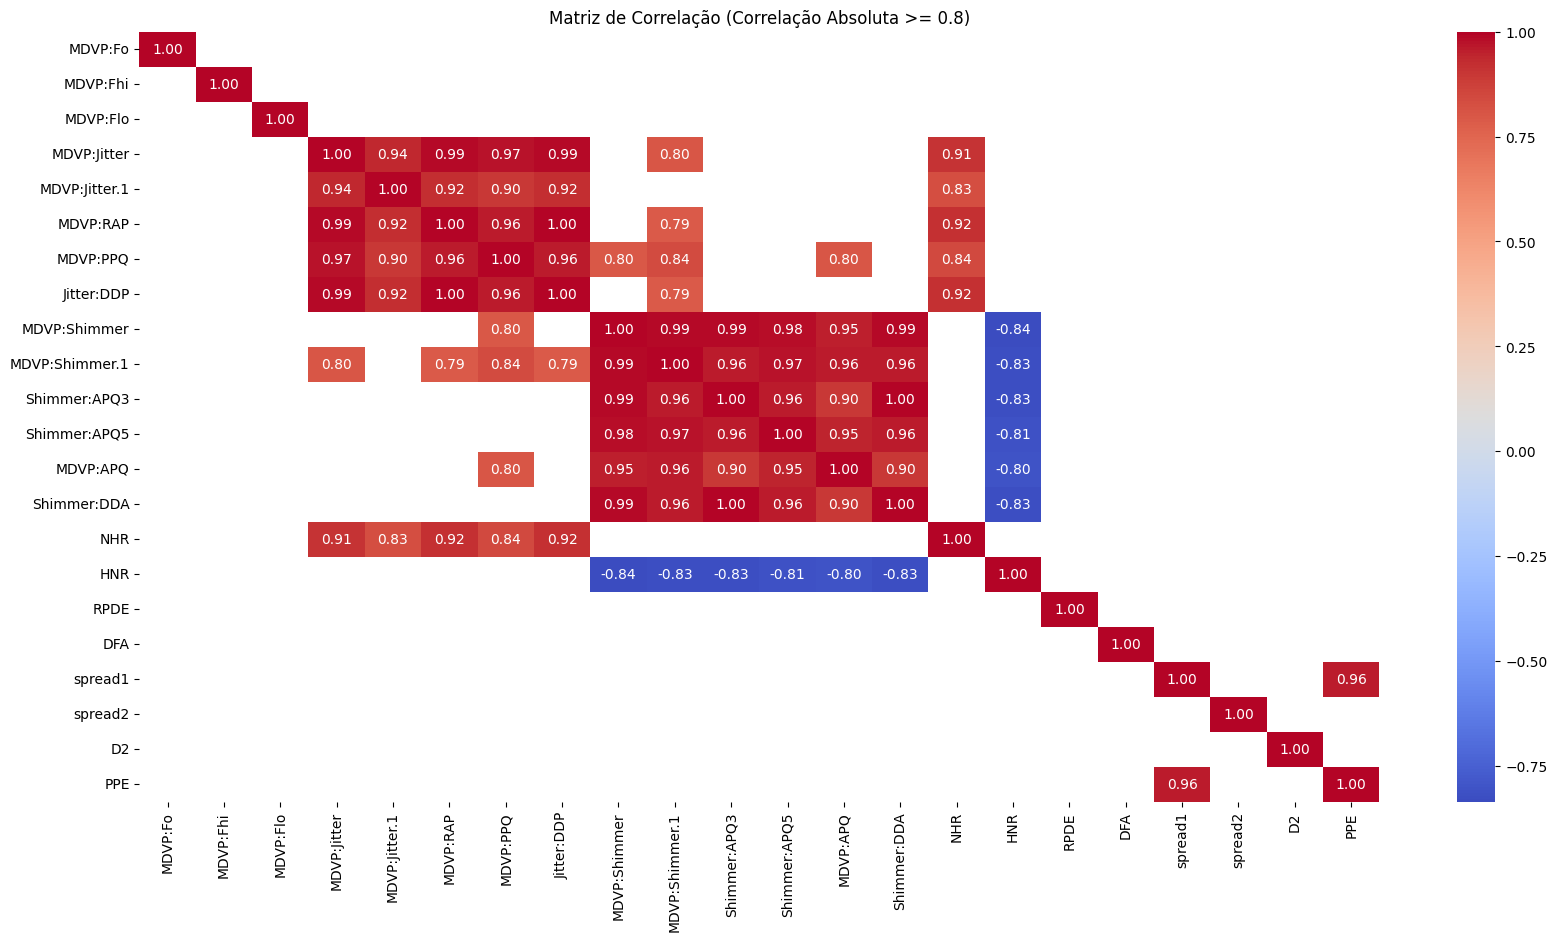

In [ ]:
correlation_matrix = x_f.corr()

mask = np.abs(correlation_matrix) < 0.79

filtered_correlation_matrix = correlation_matrix.mask(mask)

plt.figure(figsize=(20, 10))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (Correlação Absoluta >= 0.8)')
plt.show()

Primeiramente, nota‑se que quase todos os parâmetros de jitter (MDVP:Jitter %, MDVP:Jitter Abs, MDVP:RAP, MDVP:PPQ, Jitter:DDP) exibem correlações positivas altíssimas entre si (variando de ~0,90 a ~1,00). Isso indica que essas métricas capturam essencialmente a mesma informação sobre a instabilidade da frequência fundamental, e talvez seja suficiente manter apenas uma ou duas delas no modelo.

De modo semelhante, as medidas de shimmer (MDVP:Shimmer, MDVP:Shimmer dB, Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA) também formam um bloco extremamente correlacionado (coeficientes de ~0,95 a ~1,00). Elas representam variações de amplitude muito próximas entre si, de modo que selecionar uma única métrica de shimmer já pode preservar quase toda a variabilidade explicativa, reduzindo ruído e acelerando o treinamento.

Em contraste, a razão harmônico‑ruído (HNR) apresenta fortes correlações negativas (≈–0,80 a –0,84) com as várias métricas de shimmer, o que faz sentido fisiológico: quanto maior o ruído (shimmer), menor a proporção harmônica. Essa relação inversa sugere que incluir simultaneamente HNR e várias métricas de shimmer sem controle pode confundir o modelo.

Fora desses grandes clusters, parâmetros como RPDE e DFA estão pouco correlacionados com as outras medidas (nenhuma correlação extrema), indicando que trazem informação complementar sobre a dinâmica vocal não capturada pelos simples índices de perturbação. As variáveis spread1, spread2, D2 e PPE também têm correlações muito modestas entre si e com os demais, reforçando seu valor potencial na diferenciação de pacientes.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_f_const = sm.add_constant(x_f_scaled)

vif_data = pd.DataFrame({
    'Variável': x_f_const.columns,
    'VIF': [variance_inflation_factor(x_f_const.values, i) for i in range(x_f_const.shape[1])]
})

display(vif_data)

Variável           VIF
0            const  8.015568e+00
1          MDVP:Fo  7.101626e+00
2         MDVP:Fhi  1.568587e+00
3         MDVP:Flo  2.216546e+00
4      MDVP:Jitter  1.919769e+02
5    MDVP:Jitter.1  4.716608e+01
6         MDVP:RAP  1.394371e+06
7         MDVP:PPQ  1.080988e+02
8       Jitter:DDP  1.395141e+06
9     MDVP:Shimmer  7.597653e+02
10  MDVP:Shimmer.1  9.930468e+01
11    Shimmer:APQ3  1.508607e+07
12    Shimmer:APQ5  1.064236e+02
13        MDVP:APQ  6.192872e+01
14     Shimmer:DDA  1.507798e+07
15             NHR  1.165025e+01
16             HNR  7.325529e+00
17            RPDE  3.794495e+00
18             DFA  3.043194e+00
19         spread1  2.070846e+01
20         spread2  2.889591e+00
21              D2  3.481727e+00
22             PPE  2.825397e+01

Há claramente que um problema de multicolinearidade severa entre diversas features, iremos aplicar o PCA para resolver isso.

# **Aplicando o PCA**

In [ ]:
from sklearn.decomposition import PCA
pca_full = PCA()
pca_full.fit(x_f_scaled)
var_ratio = pca_full.explained_variance_ratio_
var_acumulada = var_ratio.cumsum()
print("Variância acumulada para cada número de componentes:")
for i, var in enumerate(var_acumulada, start=1):
    print(f"  {i} componentes → {var:.4f}")

n_para_95 = next(i for i, v in enumerate(var_acumulada, start=1) if v >= 0.95)
print(f"\nNúmero mínimo de componentes para ≥ 95% da variância: {n_para_95}")

Variância acumulada para cada número de componentes:
  1 componentes → 0.7014
  2 componentes → 0.7885
  3 componentes → 0.8470
  4 componentes → 0.8902
  5 componentes → 0.9215
  6 componentes → 0.9454
  7 componentes → 0.9583
  8 componentes → 0.9706
  9 componentes → 0.9775
  10 componentes → 0.9837
  11 componentes → 0.9892
  12 componentes → 0.9934
  13 componentes → 0.9959
  14 componentes → 0.9974
  15 componentes → 0.9982
  16 componentes → 0.9989
  17 componentes → 0.9994
  18 componentes → 0.9998
  19 componentes → 1.0000
  20 componentes → 1.0000
  21 componentes → 1.0000
  22 componentes → 1.0000

Número mínimo de componentes para ≥ 95% da variância: 7


In [ ]:
n_componentes = 7
pca_7 = PCA(n_components=n_componentes)

x_f_pca_7 = pca_7.fit_transform(x_f_scaled)

colunas_pca_7 = [f'PC{i+1}' for i in range(n_componentes)]
x_f_pca = pd.DataFrame(x_f_pca_7, columns=colunas_pca_7, index=x_f_scaled.index)
display(x_f_pca)

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0    1.612041 -1.664451 -0.456549 -0.348691 -0.878966 -0.638108  0.449257
1    3.630707 -3.043396  0.483128 -0.640106 -1.508394 -0.217565  0.257375
2    3.214541 -2.288181 -0.512897 -0.963085 -1.931774 -0.232225  0.065617
3    3.205652 -2.682694 -0.231036 -0.653786 -1.784043 -0.149260  0.166995
4    4.968903 -2.688761 -0.249513 -1.411300 -2.317523 -0.839048 -0.643386
..        ...       ...       ...       ...       ...       ...       ...
190 -0.007306  0.019044  1.641397 -0.310666  1.074956 -0.927405 -0.350943
191 -0.537435  0.716677  0.888321  0.196230  0.194212 -0.344328 -0.889815
192  3.459207  3.667992 -0.956688  0.189662  1.439171 -0.142393  0.443812
193  0.841655  2.978917  0.724735  1.295364  0.715865 -1.061522  0.560216
194 -0.469944  1.637915  0.180741  0.889761  0.687513  0.015214 -0.193175

[195 rows x 7 columns]

In [ ]:
x_f_const = sm.add_constant(x_f_pca)

vif_data = pd.DataFrame({
    'Variável': x_f_const.columns,
    'VIF': [variance_inflation_factor(x_f_const.values, i) for i in range(x_f_const.shape[1])]
})

display(vif_data)

Variável  VIF
0    const  1.0
1      PC1  1.0
2      PC2  1.0
3      PC3  1.0
4      PC4  1.0
5      PC5  1.0
6      PC6  1.0
7      PC7  1.0

**Problema Resolvido**

# **MODELOS**

# **MODELO DE AGRUPAMENTO 1**

In [ ]:
coords = {'features': [col for col in x_f_pca.columns]}
coords

{'features': ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']}

In [ ]:
with pm.Model(coords=coords) as model_cluster:
    μ0 = pm.Normal("m0",0,3,dims="features")
    μ1 = pm.Normal("m1",0,3,dims="features")

    w = pm.Dirichlet("w",[0.5,0.5])

    sigma0 = pm.HalfNormal('sigma0', 1, dims="features")
    sigma1 = pm.HalfNormal('sigma1', 1, dims="features")

    cov_sigma0 = at.diag(sigma0)

    cov_sigma1 = at.diag(sigma1)

    components = [pm.MvNormal.dist(μ0, cov_sigma0)
                 ,pm.MvNormal.dist(μ1, cov_sigma1)]
    g = pm.Mixture("g",w,components,observed=x_f_pca.values)

In [ ]:
model_cluster

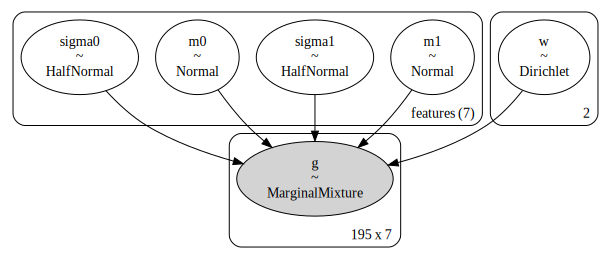

In [ ]:
pm.model_to_graphviz(model_cluster)

# **Análise a Priori**

In [ ]:
with model_cluster:
  trace_priori_model_cluster = pm.sample_prior_predictive()

array([<Axes: xlabel='g'>], dtype=object)

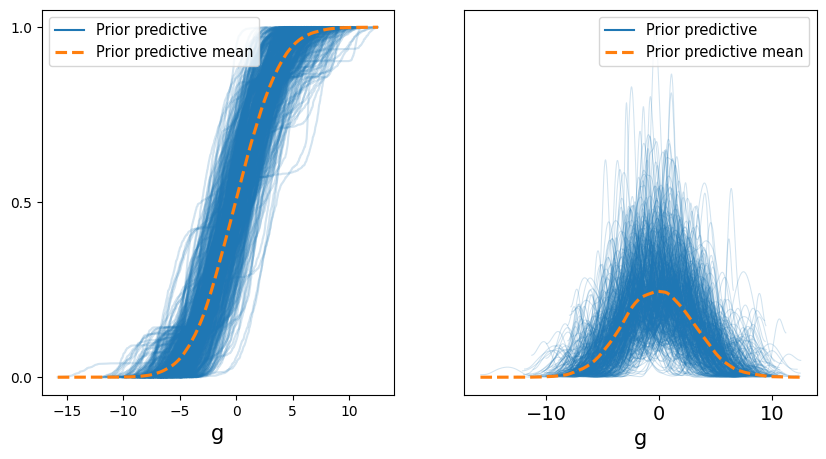

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori_model_cluster, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori_model_cluster, group='prior',ax=axes[1])

In [ ]:
with model_cluster:
  approx_cluster = pm.fit(20000)

Output()

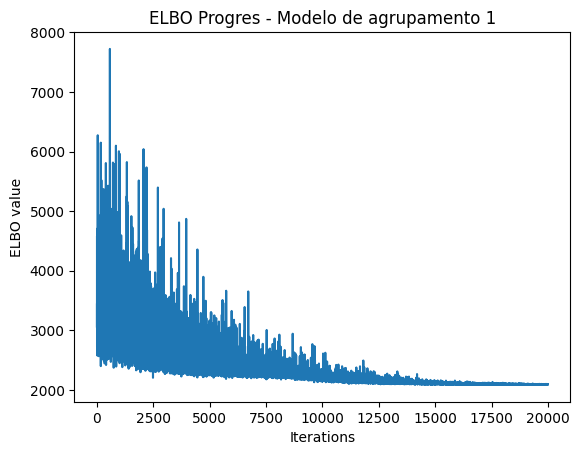

In [ ]:
plt.plot(approx_cluster.hist)
plt.title('ELBO Progres - Modelo de agrupamento 1')
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.show()

Após cerca de 12 000–15 000 iterações, a curva se aproxima de um patamar em torno de 2 100–2 200, com ruído residual mínimo, indicando que 20000 iterações é mais do que o suficiente.

In [ ]:
with model_cluster:
  trace_cluster = approx_cluster.sample(10000)
pm.summary(trace_cluster)

Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m0[PC1]      3.055  0.469   2.179    3.938      0.005    0.003    9719.0   
m0[PC2]     -0.280  0.255  -0.769    0.187      0.003    0.002   10229.0   
m0[PC3]      0.431  0.197   0.062    0.802      0.002    0.001   10079.0   
m0[PC4]      0.448  0.186   0.083    0.786      0.002    0.001    9844.0   
m0[PC5]     -0.105  0.172  -0.426    0.215      0.002    0.001    9981.0   
m0[PC6]     -0.103  0.147  -0.378    0.169      0.001    0.001    9618.0   
m0[PC7]      0.058  0.077  -0.086    0.205      0.001    0.001    9946.0   
m1[PC1]     -1.607  0.184  -1.950   -1.262      0.002    0.001    9749.0   
m1[PC2]      0.129  0.106  -0.079    0.325      0.001    0.001    9593.0   
m1[PC3]     -0.200  0.101  -0.386   -0.010      0.001    0.001    9503.0   
m1[PC4]     -0.215  0.067  -0.340   -0.088      0.001    0.000   10169.0   
m1[PC5]      0.047  0.057  -0.065    0.151      0.001    0.000    8835.0   
m1[PC6]      0.046  0.058  -0.062    0.153      0.001    0.000    9706.0   
m1[PC7]     -0.028  0.058  -0.139    0.079      0.001    0.000   10142.0   
sigma0[PC1]  8.594  0.905   6.879   10.261      0.009    0.007    9967.0   
sigma0[PC2]  3.147  0.459   2.312    4.006      0.005    0.004    9900.0   
sigma0[PC3]  1.805  0.321   1.229    2.408      0.003    0.003    9458.0   
sigma0[PC4]  1.796  0.318   1.221    2.391      0.003    0.003    9827.0   
sigma0[PC5]  1.596  0.287   1.082    2.128      0.003    0.002   10060.0   
sigma0[PC6]  1.109  0.215   0.729    1.519      0.002    0.002    9787.0   
sigma0[PC7]  0.252  0.054   0.157    0.352      0.001    0.000   10039.0   
sigma1[PC1]  2.223  0.360   1.556    2.896      0.004    0.003    9587.0   
sigma1[PC2]  1.021  0.149   0.759    1.311      0.001    0.001    9946.0   
sigma1[PC3]  0.974  0.140   0.714    1.233      0.001    0.001   10121.0   
sigma1[PC4]  0.437  0.072   0.307    0.571      0.001    0.001    9704.0   
sigma1[PC5]  0.296  0.046   0.214    0.382      0.000    0.000    9854.0   
sigma1[PC6]  0.295  0.043   0.215    0.376      0.000    0.000    9848.0   
sigma1[PC7]  0.335  0.046   0.253    0.426      0.000    0.000    9963.0   
w[0]         0.320  0.043   0.245    0.401      0.000    0.000   10003.0   
w[1]         0.680  0.043   0.599    0.755      0.000    0.000   10003.0   

             ess_tail  r_hat  
m0[PC1]       10166.0    NaN  
m0[PC2]        9820.0    NaN  
m0[PC3]        9837.0    NaN  
m0[PC4]       10003.0    NaN  
m0[PC5]        9879.0    NaN  
m0[PC6]        9757.0    NaN  
m0[PC7]        9920.0    NaN  
m1[PC1]        9721.0    NaN  
m1[PC2]        9694.0    NaN  
m1[PC3]        9386.0    NaN  
m1[PC4]       10007.0    NaN  
m1[PC5]       10003.0    NaN  
m1[PC6]        9846.0    NaN  
m1[PC7]       10089.0    NaN  
sigma0[PC1]    9516.0    NaN  
sigma0[PC2]    9644.0    NaN  
sigma0[PC3]    9761.0    NaN  
sigma0[PC4]    9843.0    NaN  
sigma0[PC5]   10174.0    NaN  
sigma0[PC6]    9604.0    NaN  
sigma0[PC7]    9768.0    NaN  
sigma1[PC1]    9188.0    NaN  
sigma1[PC2]    9866.0    NaN  
sigma1[PC3]    9405.0    NaN  
sigma1[PC4]    9564.0    NaN  
sigma1[PC5]    9919.0    NaN  
sigma1[PC6]    9756.0    NaN  
sigma1[PC7]    9995.0    NaN  
w[0]           9260.0    NaN  
w[1]           9260.0    NaN

array([[<Axes: title={'center': 'm0'}>, <Axes: title={'center': 'm0'}>],
       [<Axes: title={'center': 'm1'}>, <Axes: title={'center': 'm1'}>],
       [<Axes: title={'center': 'sigma0'}>,
        <Axes: title={'center': 'sigma0'}>],
       [<Axes: title={'center': 'sigma1'}>,
        <Axes: title={'center': 'sigma1'}>],
       [<Axes: title={'center': 'w'}>, <Axes: title={'center': 'w'}>]],
      dtype=object)

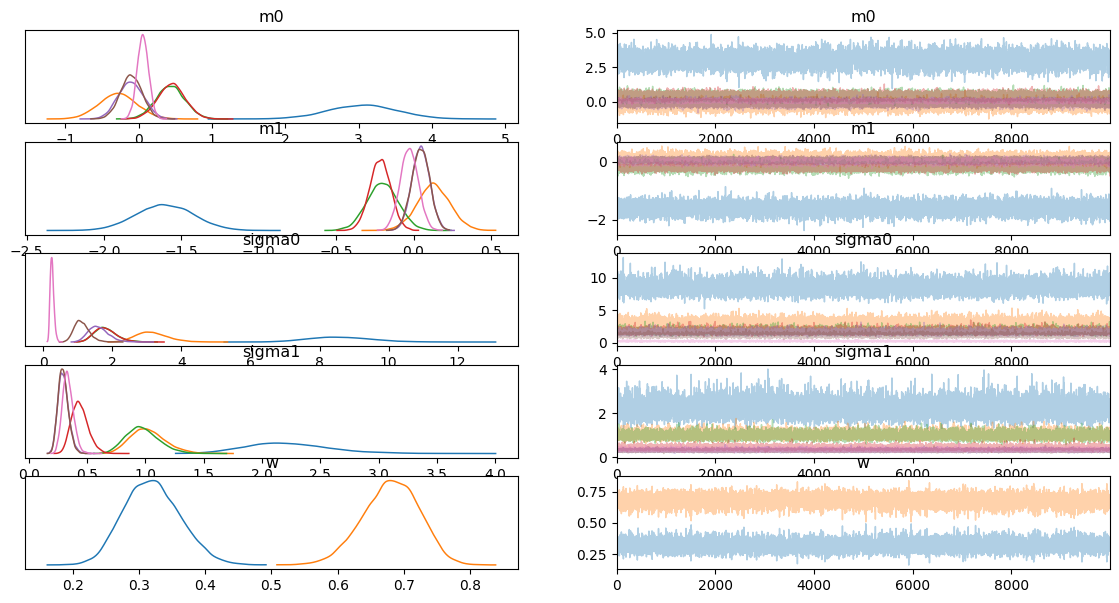

In [ ]:
az.plot_trace(trace_cluster, figsize=(14, 7))

# **Análise a Posteriori**

In [ ]:
with model_cluster:
  trace_post_model_cluster = pm.sample_posterior_predictive(trace_cluster)

Output()

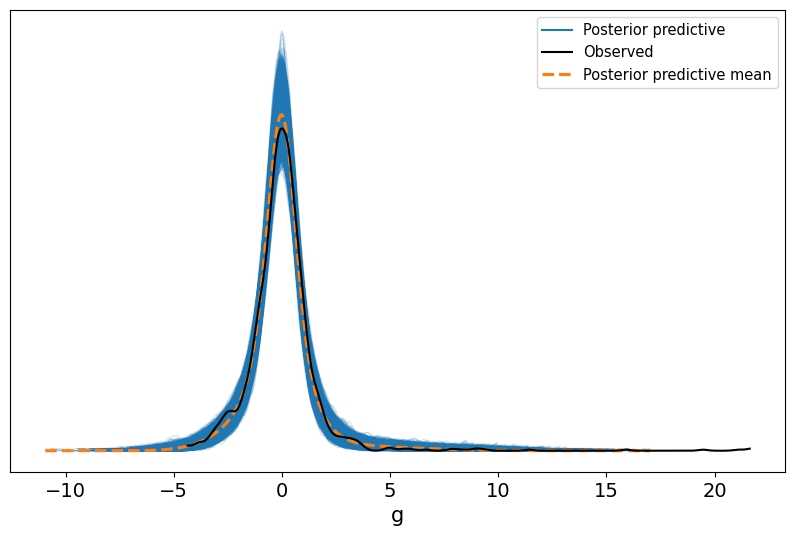

In [ ]:
az.plot_ppc(trace_post_model_cluster, mean=True, figsize=(10, 6), textsize=14)

plt.show()

Na região central (próxima a zero), nota‑se excelente concordância entre modelo e dados: a média preditiva (tracejada laranja) praticamente coincide com a densidade observada (preta), e o envelope das amostras cobre toda a variação empírica. Isso indica que o modelo captura muito bem a forma e o pico da distribuição, com incerteza plausível representada pelo azul.

Nos extremos valores de g abaixo de –5 ou acima de 5 o modelo também consegue reproduzir a cauda pesada dos dados, embora com maior dispersão entre as amostras preditivas. Esse alargamento reflete maior incerteza do modelo nessas regiões de poucas observações, mas ainda assim inclui as caudas observadas, mostrando que o ajuste não superestima ou subestima sistematicamente eventos extremos.

# **MODELO DE AGRUPAMENTO 2**

In [ ]:
with pm.Model(coords=coords) as model_cluster_2:
    μ0 = pm.Normal("m0", mu=0, sigma=3, dims="features")
    μ1 = pm.Normal("m1", mu=0, sigma=3, dims="features")
    μ2 = pm.Normal("m2", mu=0, sigma=3, dims="features")

    w = pm.Dirichlet("w", a=[1/3, 1/3, 1/3])

    sigma0 = pm.HalfNormal('sigma0', sigma=1, dims="features")
    sigma1 = pm.HalfNormal('sigma1', sigma=1, dims="features")
    sigma2 = pm.HalfNormal('sigma2', sigma=1, dims="features")

    cov_sigma0 = at.diag(sigma0)
    cov_sigma1 = at.diag(sigma1)
    cov_sigma2 = at.diag(sigma2)

    components = [
        pm.MvNormal.dist(μ0, cov_sigma0),
        pm.MvNormal.dist(μ1, cov_sigma1),
        pm.MvNormal.dist(μ2, cov_sigma2)
    ]

    g = pm.Mixture("g", w, components, observed=x_f_pca.values)

In [ ]:
model_cluster_2

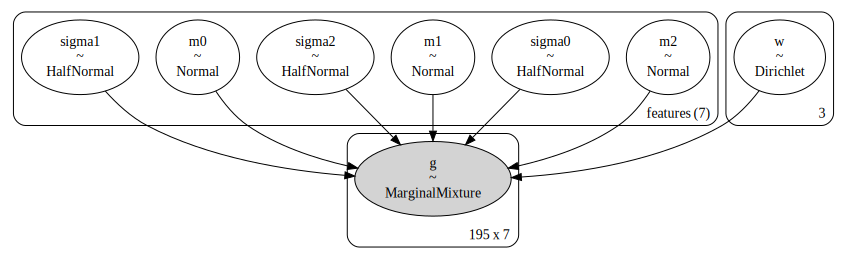

In [ ]:
pm.model_to_graphviz(model_cluster_2)

# **Análise a Priori**

In [ ]:
with model_cluster_2:
  trace_priori_model_cluster_2 = pm.sample_prior_predictive()

array([<Axes: xlabel='g'>], dtype=object)

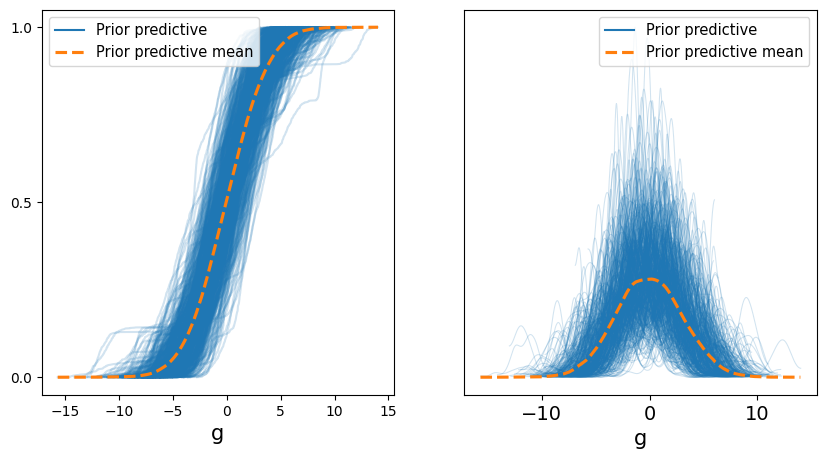

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori_model_cluster_2, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori_model_cluster_2, group='prior',ax=axes[1])

In [ ]:
with model_cluster_2:
  approx_cluster_2 = pm.fit(20000)

Output()

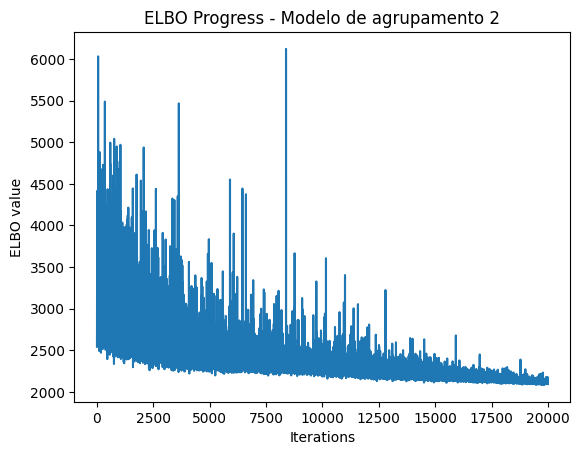

In [ ]:
plt.plot(approx_cluster_2.hist)
plt.title('ELBO Progress - Modelo de agrupamento 2')
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.show()

Nesse gráfico do Modelo 2 em comparação com o do Modelp 1, A única diferença é que agora apenas após 17500 iterações, a curva se aproxima de um patamar em torno de 2 100–2 200, com ruído residual mínimo, mais ainda indicando que 20000 iterações é mais do que o suficiente.

In [ ]:
with model_cluster_2:
  trace_cluster_2 = approx_cluster_2.sample(10000)
pm.summary(trace_cluster_2)

Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m0[PC1]     -1.884  0.273  -2.417   -1.387      0.003    0.002    9833.0   
m0[PC2]     -0.002  0.123  -0.233    0.229      0.001    0.001    9569.0   
m0[PC3]     -0.558  0.104  -0.756   -0.361      0.001    0.001    9852.0   
m0[PC4]     -0.238  0.083  -0.386   -0.075      0.001    0.001    9907.0   
m0[PC5]     -0.015  0.073  -0.155    0.117      0.001    0.001    9444.0   
m0[PC6]      0.076  0.067  -0.046    0.201      0.001    0.000    9960.0   
m0[PC7]      0.252  0.074   0.117    0.395      0.001    0.001   10083.0   
m1[PC1]     -0.391  0.555  -1.432    0.643      0.006    0.004    9979.0   
m1[PC2]      0.186  0.247  -0.276    0.648      0.002    0.002   10002.0   
m1[PC3]      0.304  0.214  -0.092    0.708      0.002    0.002   10151.0   
m1[PC4]     -0.058  0.166  -0.371    0.251      0.002    0.001    9721.0   
m1[PC5]      0.182  0.136  -0.067    0.447      0.001    0.001    9883.0   
m1[PC6]      0.021  0.136  -0.236    0.277      0.001    0.001   10067.0   
m1[PC7]     -0.491  0.082  -0.646   -0.336      0.001    0.001    9763.0   
m2[PC1]      2.266  0.724   0.906    3.598      0.007    0.005    9490.0   
m2[PC2]     -0.160  0.309  -0.757    0.401      0.003    0.002    9729.0   
m2[PC3]      0.518  0.232   0.079    0.964      0.002    0.002    9803.0   
m2[PC4]      0.413  0.238  -0.012    0.877      0.002    0.002    9613.0   
m2[PC5]     -0.162  0.213  -0.562    0.244      0.002    0.002    9231.0   
m2[PC6]     -0.109  0.185  -0.455    0.236      0.002    0.001    9960.0   
m2[PC7]      0.153  0.094  -0.024    0.326      0.001    0.001    9683.0   
sigma0[PC1]  1.858  0.453   1.051    2.699      0.004    0.004   10308.0   
sigma0[PC2]  0.703  0.139   0.454    0.962      0.001    0.001   10424.0   
sigma0[PC3]  0.547  0.111   0.362    0.766      0.001    0.001   10087.0   
sigma0[PC4]  0.340  0.073   0.209    0.476      0.001    0.001   10000.0   
sigma0[PC5]  0.263  0.054   0.172    0.371      0.001    0.000   10277.0   
sigma0[PC6]  0.201  0.042   0.126    0.281      0.000    0.000   10142.0   
sigma0[PC7]  0.258  0.049   0.173    0.353      0.000    0.000   10158.0   
sigma1[PC1]  3.514  1.155   1.625    5.691      0.011    0.012   10199.0   
sigma1[PC2]  1.539  0.324   0.961    2.141      0.003    0.003    9858.0   
sigma1[PC3]  1.229  0.280   0.739    1.755      0.003    0.002    9355.0   
sigma1[PC4]  0.839  0.250   0.426    1.303      0.002    0.003    9957.0   
sigma1[PC5]  0.404  0.117   0.212    0.628      0.001    0.001    8857.0   
sigma1[PC6]  0.575  0.148   0.314    0.847      0.002    0.001    9657.0   
sigma1[PC7]  0.128  0.040   0.060    0.206      0.000    0.000    9708.0   
sigma2[PC1]  8.748  2.245   5.043   13.120      0.023    0.020    9885.0   
sigma2[PC2]  3.293  0.510   2.387    4.269      0.005    0.004   10167.0   
sigma2[PC3]  1.825  0.384   1.150    2.546      0.004    0.003   10125.0   
sigma2[PC4]  1.884  0.372   1.235    2.608      0.004    0.003    9951.0   
sigma2[PC5]  1.713  0.351   1.094    2.373      0.003    0.003   10285.0   
sigma2[PC6]  1.135  0.250   0.700    1.605      0.003    0.002    9499.0   
sigma2[PC7]  0.246  0.065   0.132    0.366      0.001    0.001    9426.0   
w[0]         0.421  0.045   0.334    0.504      0.000    0.000    9807.0   
w[1]         0.294  0.046   0.209    0.381      0.000    0.000   10130.0   
w[2]         0.286  0.060   0.175    0.396      0.001    0.000   10013.0   

             ess_tail  r_hat  
m0[PC1]        9228.0    NaN  
m0[PC2]        9573.0    NaN  
m0[PC3]       10083.0    NaN  
m0[PC4]        9385.0    NaN  
m0[PC5]        9664.0    NaN  
m0[PC6]        9716.0    NaN  
m0[PC7]        9836.0    NaN  
m1[PC1]        8771.0    NaN  
m1[PC2]        9356.0    NaN  
m1[PC3]        9838.0    NaN  
m1[PC4]       10056.0    NaN  
m1[PC5]        9418.0    NaN  
m1[PC6]        9841.0    NaN  
m1[PC7]        9307.0    NaN  
m2[PC1]        9234.0    NaN  
m2[PC2]        9920.0

array([[<Axes: title={'center': 'm0'}>, <Axes: title={'center': 'm0'}>],
       [<Axes: title={'center': 'm1'}>, <Axes: title={'center': 'm1'}>],
       [<Axes: title={'center': 'm2'}>, <Axes: title={'center': 'm2'}>],
       [<Axes: title={'center': 'sigma0'}>,
        <Axes: title={'center': 'sigma0'}>],
       [<Axes: title={'center': 'sigma1'}>,
        <Axes: title={'center': 'sigma1'}>],
       [<Axes: title={'center': 'sigma2'}>,
        <Axes: title={'center': 'sigma2'}>],
       [<Axes: title={'center': 'w'}>, <Axes: title={'center': 'w'}>]],
      dtype=object)

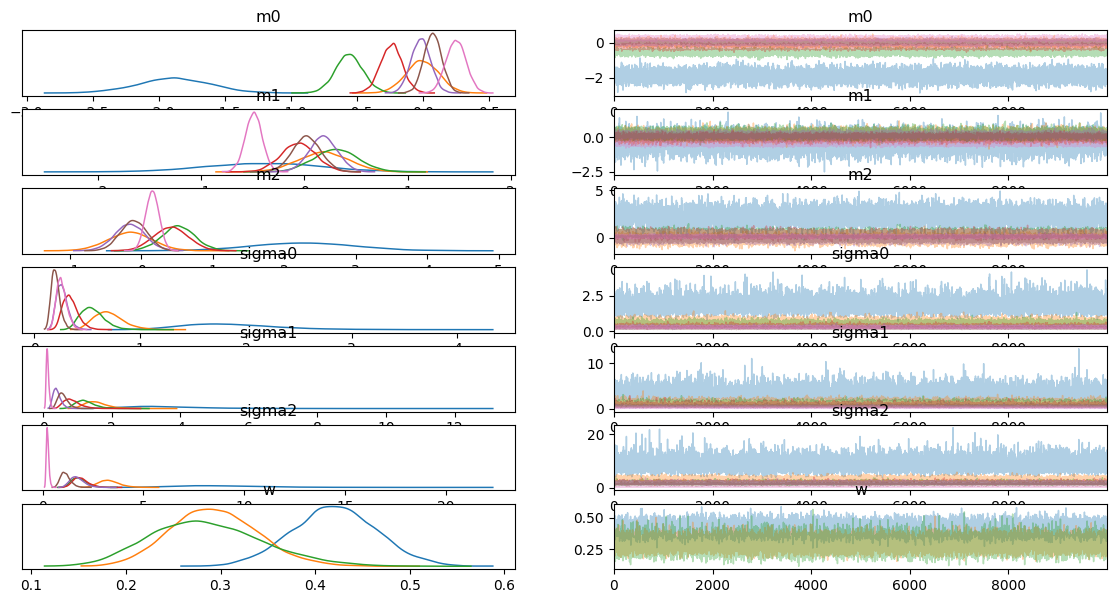

In [ ]:
az.plot_trace(trace_cluster_2, figsize=(14, 7))

# **Análise a Posteriori**

In [ ]:
with model_cluster_2:
  trace_post_model_cluster_2 = pm.sample_posterior_predictive(trace_cluster_2)

Output()

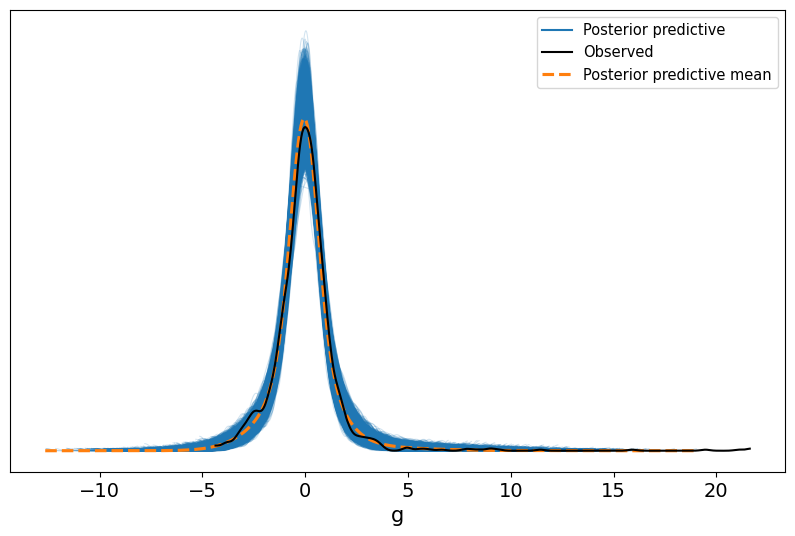

In [ ]:
az.plot_ppc(trace_post_model_cluster_2, mean=True, figsize=(10, 6), textsize=14)

plt.show()

Análisando visualmente da densidade preditiva a posteriori do Modelo 2 confirma que ele, assim como o Modelo 1, reproduz com alta fidelidade o formato central e as caudas da distribuição observada de g, ou seja não parece ter tido diferenças.

# **Comparação/Modelo Vencedor**

In [ ]:
with model_cluster:
    pm.compute_log_likelihood(trace_cluster)

with model_cluster_2:
    pm.compute_log_likelihood(trace_cluster_2)

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

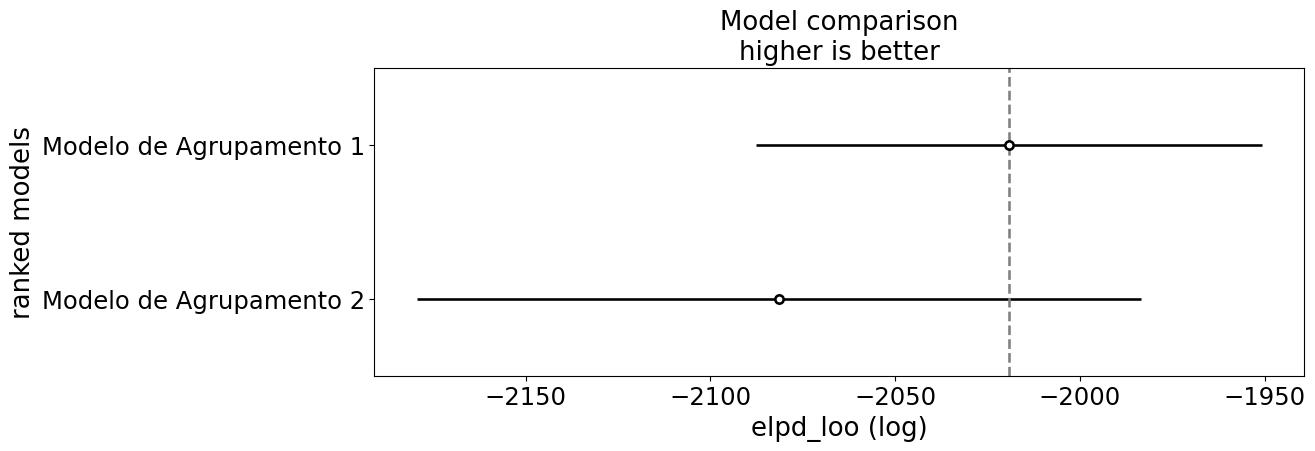

In [ ]:
model_compare = az.compare(
    {
        "Modelo de Agrupamento 1": trace_cluster,
        "Modelo de Agrupamento 2": trace_cluster_2
    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [ ]:
model_compare

rank     elpd_loo       p_loo  elpd_diff    weight  \
Modelo de Agrupamento 1     0 -2019.137855   49.366692   0.000000  0.997514   
Modelo de Agrupamento 2     1 -2081.392292  153.205993  62.254437  0.002486   

                                se        dse  warning scale  
Modelo de Agrupamento 1  68.479407   0.000000     True   log  
Modelo de Agrupamento 2  98.071826  33.226963     True   log

**Modelo de Agrupamento 1** foi o vencedor, iremos fazer os clusters com ele

In [ ]:
g_samples = trace_post_model_cluster.posterior_predictive["g"]

mean_predictions = g_samples.mean(dim=('chain', 'draw')).values

clusters = np.argmax(mean_predictions, axis=1)

clusters

array([3, 4, 1, 1, 6, 2, 3, 6, 5, 4, 1, 2, 2, 6, 6, 2, 1, 1, 3, 6, 1, 6,
       4, 1, 2, 1, 4, 2, 1, 1, 6, 3, 2, 4, 6, 2, 5, 2, 2, 2, 1, 2, 5, 3,
       2, 1, 5, 2, 5, 2, 2, 1, 6, 1, 5, 1, 5, 1, 4, 2, 3, 2, 3, 1, 1, 1,
       1, 3, 4, 2, 2, 3, 4, 2, 2, 5, 4, 6, 2, 1, 3, 2, 2, 4, 1, 5, 2, 1,
       6, 2, 3, 2, 2, 3, 2, 2, 1, 1, 4, 4, 2, 5, 4, 3, 2, 6, 1, 1, 3, 2,
       1, 5, 3, 1, 2, 2, 2, 4, 1, 3, 1, 6, 5, 1, 1, 1, 1, 5, 4, 5, 3, 1,
       4, 4, 3, 1, 1, 2, 2, 1, 1, 1, 5, 5, 1, 2, 5, 2, 1, 1, 4, 2, 2, 1,
       4, 6, 2, 2, 5, 2, 1, 2, 3, 2, 4, 2, 1, 6, 4, 2, 3, 4, 3, 3, 1, 3,
       2, 3, 6, 5, 6, 2, 2, 2, 2, 1, 2, 3, 2, 5, 4, 2, 1, 2, 3])

In [ ]:
x_f_pca["Cluster"] = clusters
display(x_f_pca)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    1.612041 -1.664451 -0.456549 -0.348691 -0.878966 -0.638108  0.449257   
1    3.630707 -3.043396  0.483128 -0.640106 -1.508394 -0.217565  0.257375   
2    3.214541 -2.288181 -0.512897 -0.963085 -1.931774 -0.232225  0.065617   
3    3.205652 -2.682694 -0.231036 -0.653786 -1.784043 -0.149260  0.166995   
4    4.968903 -2.688761 -0.249513 -1.411300 -2.317523 -0.839048 -0.643386   
..        ...       ...       ...       ...       ...       ...       ...   
190 -0.007306  0.019044  1.641397 -0.310666  1.074956 -0.927405 -0.350943   
191 -0.537435  0.716677  0.888321  0.196230  0.194212 -0.344328 -0.889815   
192  3.459207  3.667992 -0.956688  0.189662  1.439171 -0.142393  0.443812   
193  0.841655  2.978917  0.724735  1.295364  0.715865 -1.061522  0.560216   
194 -0.469944  1.637915  0.180741  0.889761  0.687513  0.015214 -0.193175   

     Cluster  
0          3  
1          4  
2          1  
3          1  
4          6  
..       ...  
190        4  
191        2  
192        1  
193        2  
194        3  

[195 rows x 8 columns]

In [ ]:
n_clusters = x_f_pca["Cluster"].nunique()
print(f"Número de clusters feito pelo Modelo vencedor: {n_clusters}")

Número de clusters feito pelo Modelo vencedor: 6


In [ ]:
x_f_pca["Cluster"].unique()

array([3, 4, 1, 6, 2, 5])

**Separando em treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_f_pca, y_t, test_size=0.3, random_state=42)

display(X_train)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
38   -2.984917  0.605678  0.150619 -0.548843 -0.611091  0.632711  0.532248   
31   -3.827529  1.502801  0.341220 -1.055124 -0.383947  0.477485  0.687146   
173  -2.657135 -0.173285 -1.407932 -0.578671 -0.088038 -0.307469  0.512503   
12   -3.152793  0.664889 -0.437264 -0.282610  0.601563  0.005633 -0.201826   
109   0.225051 -0.178632  0.027128  0.249116 -0.599013  0.031902 -0.243820   
..         ...       ...       ...       ...       ...       ...       ...   
106  -3.951486  0.860431 -0.116300 -0.553968  0.279561  0.304810  0.602952   
14   -2.662733 -0.025463 -0.356829  0.357924  0.774857 -0.286109 -0.146287   
92   -0.167783 -0.752655  1.128267 -1.298907  0.549093 -0.707847 -0.445628   
179  -2.152237 -0.051168 -0.550940  0.087942 -0.448017  1.048996  0.318576   
102  19.455302  5.511262 -0.049933  1.415311 -0.148708 -2.379089  0.779501   

     Cluster  
38         2  
31         3  
173        3  
12         2  
109        2  
..       ...  
106        1  
14         6  
92         2  
179        5  
102        4  

[136 rows x 8 columns]

In [ ]:
display(y_train)

38     1
31     0
173    0
12     1
109    1
      ..
106    1
14     1
92     1
179    1
102    1
Name: status, Length: 136, dtype: int64

In [ ]:
y_train.value_counts()

status
1    103
0     33
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

status
1    44
0    15
Name: count, dtype: int64

**Função para plotar a Priori e Posteriori**

In [ ]:
def plot_discrete_ppc(idata, var_name="likelihood", group="posterior", figsize=(12, 5)):

    y_p = idata.observed_data[var_name].values

    if group == "prior":
        y_rep = idata.prior_predictive[var_name].values
    else:
        y_rep = idata.posterior_predictive[var_name].values

    y_rep = y_rep.reshape(-1, len(y_p))

    prop_ones = y_rep.mean(axis=1)
    prop_zeros = 1 - prop_ones

    mean_ones = prop_ones.mean()
    ci_ones = np.percentile(prop_ones, [2.5, 97.5])
    mean_zeros = prop_zeros.mean()
    ci_zeros = np.percentile(prop_zeros, [2.5, 97.5])

    cats = [0, 1]
    means = [mean_zeros, mean_ones]
    ci_lows = [mean_zeros - ci_zeros[0], mean_ones - ci_ones[0]]
    ci_highs = [ci_zeros[1] - mean_zeros, ci_ones[1] - mean_ones]


    fig, axes = plt.subplots(1, 2, figsize=figsize)


    axes[0].bar(cats, means, yerr=[ci_lows, ci_highs], capsize=5, tick_label=['0', '1'])
    axes[0].axhline(y_p.mean(), color='k', linestyle='--', label='Observado')
    axes[0].set_title(f'PPC {"A Priori" if group=="prior" else "A Posteriori"} — Barras c/ IC 95%')
    axes[0].set_xlabel('Categoria')
    axes[0].set_ylabel('Proporção predita')
    axes[0].legend()


    axes[1].hist(prop_ones, bins=30, alpha=0.7)
    axes[1].axvline(y_p.mean(), color='k', linestyle='--', label='Observado')
    axes[1].set_title(f'PPC {"A Priori" if group=="prior" else "A Posteriori"} — Histograma da Proporção de 1s')
    axes[1].set_xlabel('Proporção de 1s')
    axes[1].set_ylabel('Frequência')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# **MODELOS**

# **CLASSIFICAÇÃO - REGRESSÃO LOGISTICA**

In [ ]:
#Como vai ser uma regressão logistica simples, não irei usar os clusters, por isso filtrei por enquanto

X_train_filtered = X_train.drop(['Cluster'],axis =1)
display(X_train_filtered )

PC1       PC2       PC3       PC4       PC5       PC6       PC7
38   -2.984917  0.605678  0.150619 -0.548843 -0.611091  0.632711  0.532248
31   -3.827529  1.502801  0.341220 -1.055124 -0.383947  0.477485  0.687146
173  -2.657135 -0.173285 -1.407932 -0.578671 -0.088038 -0.307469  0.512503
12   -3.152793  0.664889 -0.437264 -0.282610  0.601563  0.005633 -0.201826
109   0.225051 -0.178632  0.027128  0.249116 -0.599013  0.031902 -0.243820
..         ...       ...       ...       ...       ...       ...       ...
106  -3.951486  0.860431 -0.116300 -0.553968  0.279561  0.304810  0.602952
14   -2.662733 -0.025463 -0.356829  0.357924  0.774857 -0.286109 -0.146287
92   -0.167783 -0.752655  1.128267 -1.298907  0.549093 -0.707847 -0.445628
179  -2.152237 -0.051168 -0.550940  0.087942 -0.448017  1.048996  0.318576
102  19.455302  5.511262 -0.049933  1.415311 -0.148708 -2.379089  0.779501

[136 rows x 7 columns]

In [ ]:
coords = {
    'features': [col for col in X_train_filtered.columns]
}
coords

{'features': ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']}

In [ ]:
with pm.Model(coords=coords) as model_logistic:
  betas = pm.Normal("beta",0,2,dims="features")
  alpha = pm.Normal("alpha",0,2)

  X = [
    pm.MutableData("X_"+column,X_train_filtered[column].values.squeeze())
    for column in X_train_filtered.columns if np.issubdtype(x_f_pca[column].dtype, np.number)
  ]

  y = pm.MutableData("y",y_train.values.squeeze())

  mu = alpha + tt.dot(betas,X)
  likelihood = pm.Bernoulli("likelihood",pm.math.invlogit(mu),observed=y)

In [ ]:
model_logistic

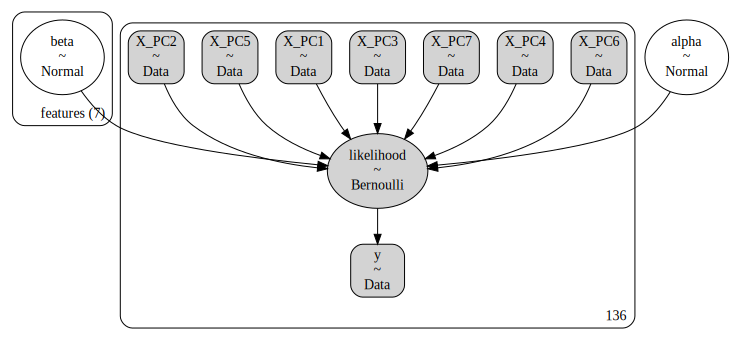

In [ ]:
pm.model_to_graphviz(model_logistic)

# **Análise a Priori**

In [ ]:
with model_logistic:
  trace_priori_model_logistic = pm.sample_prior_predictive()

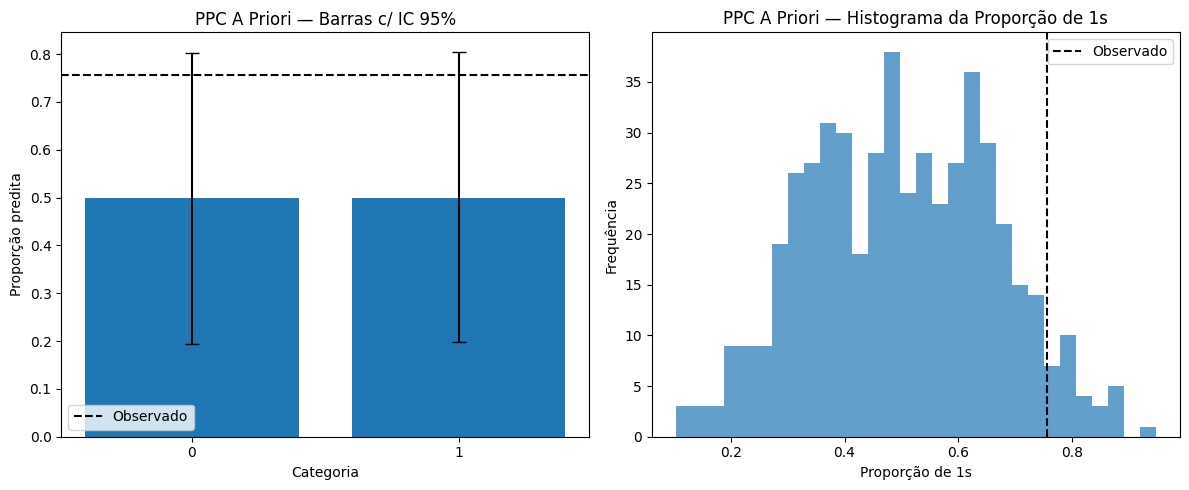

In [ ]:
plot_discrete_ppc(trace_priori_model_logistic, group="prior")

O gráfico de barras a priori mostra que, antes de ver qualquer dado, o modelo “acha” igualmente plausível cerca de 50% de observações em cada classe (0 ou 1), refletido pelas alturas iguais das duas barras. No entanto, os intervalos de confiança de 95 % são muito largos (aproximadamente de 20% a 80%).

A linha tracejada preta, que marca a proporção real de positivos (~75 %), está bem fora do centro do prior ou seja, o prior não incorpora nenhum viés em direção ao valor observado e, portanto, estamos entregando ao processo de ajuste posterior a tarefa de “aprender” essa assimetria nos dados.

No histograma o comportamento praticamente se repete onde estamos deixando bastante espaço para o dado “falar” por si só, sem impor forte crença sobre a frequência de positivos.

In [ ]:
with model_logistic:
  trace = pm.sample()
pm.summary(trace)

Output()

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha      2.718  0.520   1.748    3.657      0.017    0.011     940.0   
beta[PC1]  0.632  0.177   0.327    0.973      0.006    0.004    1028.0   
beta[PC2] -1.215  0.340  -1.875   -0.597      0.011    0.008    1023.0   
beta[PC3] -0.186  0.338  -0.789    0.452      0.009    0.008    1488.0   
beta[PC4]  0.619  0.351  -0.028    1.284      0.007    0.009    2301.0   
beta[PC5] -0.527  0.569  -1.532    0.553      0.013    0.011    1960.0   
beta[PC6]  1.083  0.492   0.152    2.008      0.012    0.011    1839.0   
beta[PC7] -0.001  0.556  -1.045    1.025      0.012    0.012    2063.0   

           ess_tail  r_hat  
alpha        1336.0    1.0  
beta[PC1]    1171.0    1.0  
beta[PC2]    1077.0    1.0  
beta[PC3]    1233.0    1.0  
beta[PC4]    1316.0    1.0  
beta[PC5]    1580.0    1.0  
beta[PC6]    1290.0    1.0  
beta[PC7]    1459.0    1.0

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

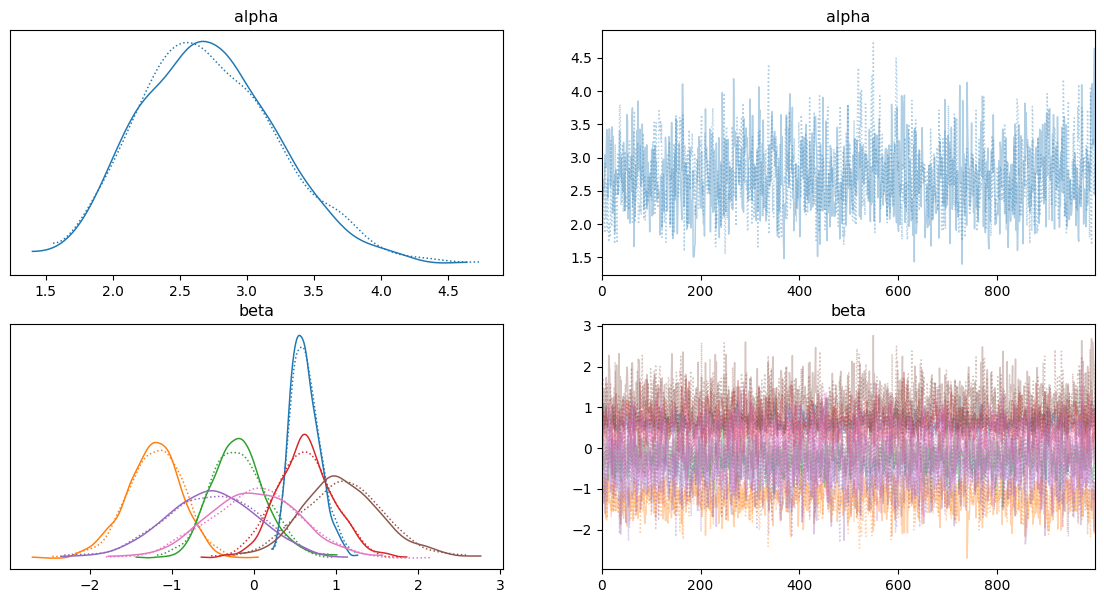

In [ ]:
az.plot_trace(trace, figsize=(14, 7))

# **Análise a Posteriori**

In [ ]:
with model_logistic:
  trace_post_model_logistic = pm.sample_posterior_predictive(trace)

Output()

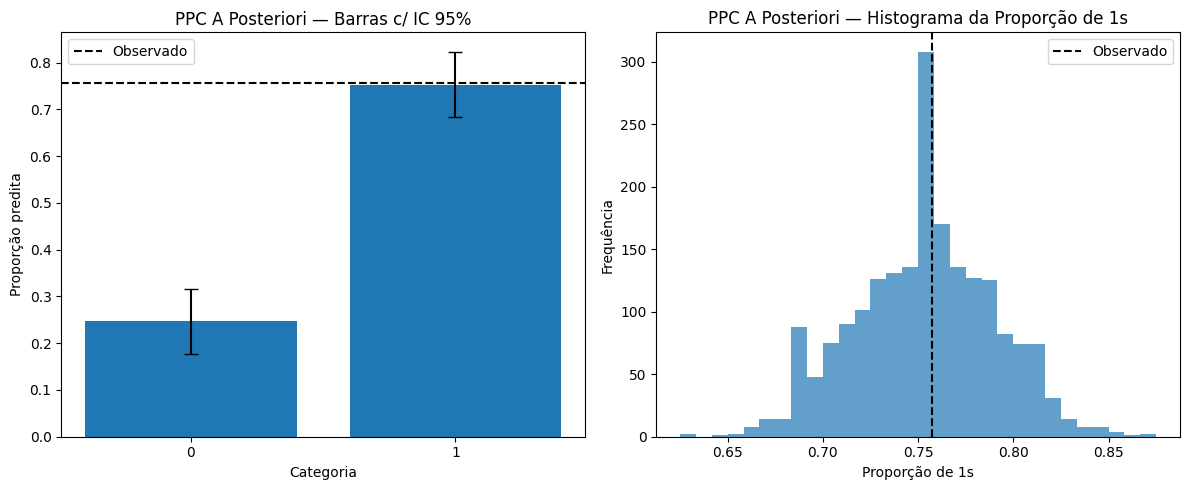

In [ ]:
plot_discrete_ppc(trace_post_model_logistic, group="posterior")

Após a atualização pelos dados, o modelo ajustou-se com precisão à prevalência observada de cada classe: a barra de “1” subiu para cerca de 75 % (IC 95 % ≈ 69 %–82 %) e a de “0” caiu para ≈ 25 % (IC 95 % ≈ 18 %–31 %), alinhando-se exatamente à proporção real (~ 76 % de casos positivos).

No histograma ao lado, a distribuição Monte Carlo das proporções de “1” concentra‑se firmemente em torno de 0,75, com pouca dispersão reflexo de alta confiança do modelo nessa estimativa. A linha pontilhada (~ 0,76) encontra‑se no pico do histograma, confirmando que não há viés residual nem subestimação/exagero na taxa de positivos.

# **CLASSIFICAÇÃO - REGRESSÃO LOGISTICA COM CLUSTERS NO ALPHA**

In [ ]:
cluster_train = X_train['Cluster'].values
cluster_test = X_test['Cluster'].values

In [ ]:
coords_2 = {
    'clusters':np.unique(cluster_train),
    'features': ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
}
cluster_idx = pd.Categorical(cluster_train, categories=[2, 3, 4, 1, 5, 6]).codes

In [ ]:
with pm.Model(coords=coords_2) as model_logistic_h:
  betas = pm.Normal("beta",0,1,dims="features")
  alpha = pm.Normal("alpha",0,1,dims="clusters")

  X = [
    pm.MutableData("X_"+column,X_train_filtered[column].values.squeeze())
    for column in X_train_filtered.columns if np.issubdtype(x_f_pca[column].dtype, np.number)
  ]

  cluster_index = pm.MutableData("cluster_index", cluster_idx)
  y = pm.MutableData("y",y_train.values.squeeze())

  mu = alpha[cluster_index] + tt.dot(betas,X)
  likelihood = pm.Bernoulli("likelihood",pm.math.invlogit(mu),observed=y)

In [ ]:
model_logistic_h

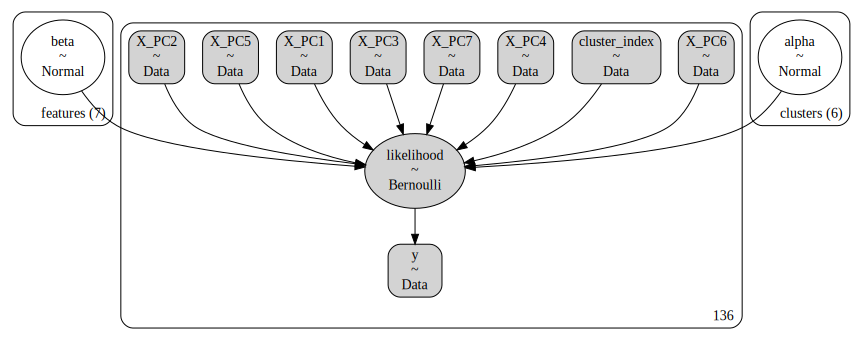

In [ ]:
pm.model_to_graphviz(model_logistic_h)

# **Análise a Priori**

In [ ]:
with model_logistic_h:
  trace_priori_model_logistic_h = pm.sample_prior_predictive()

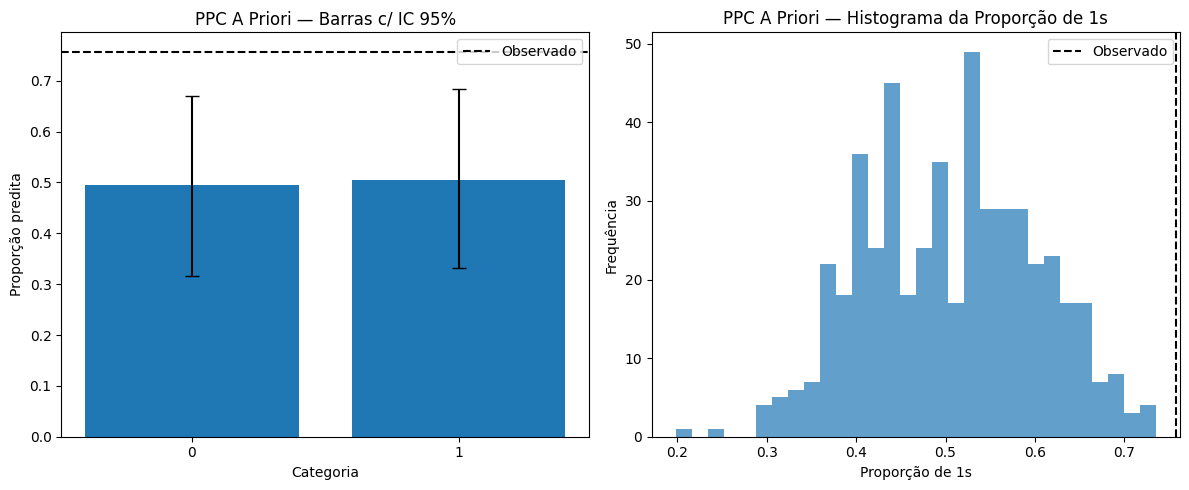

In [ ]:
plot_discrete_ppc(trace_priori_model_logistic_h, group="prior")

Barras com IC 95 % em ambas as categorias começam com média ~ 0,50, mas os intervalos credíveis (aprox. 0,32–0,67) são visivelmente mais estreitos do que no prior completamente não informativo. Isso indica que, ao agrupar só em α, estamos impondo um shrinkage maior sobre a taxa de eventos, reduzindo a incerteza inicial ao menos em comparação com a priori do modelo anterior.

Histograma da proporção de 1s a distribuição Monte Carlo concentra‑se entre 0,35 e 0,65, sem caudas tão largas quanto antes, a linha vertical no ~ 0,75 (valor observado) fica agora na borda superior do histograma, sugerindo que esse prior está mais “apertado” não coloca probabilidade alta na verdadeira prevalência.

In [ ]:
with model_logistic_h:
  trace_h = pm.sample()
pm.summary(trace_h)

Output()

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha[1]   1.570  0.420   0.745    2.312      0.007    0.008    3395.0   
alpha[2]   0.955  0.579  -0.131    2.025      0.009    0.014    4393.0   
alpha[3]   1.572  0.588   0.552    2.785      0.011    0.014    3014.0   
alpha[4]   1.727  0.474   0.815    2.582      0.008    0.012    3243.0   
alpha[5]   0.942  0.606  -0.275    2.001      0.010    0.014    3745.0   
alpha[6]   1.670  0.621   0.495    2.803      0.010    0.014    4205.0   
beta[PC1]  0.353  0.097   0.186    0.542      0.002    0.002    2255.0   
beta[PC2] -0.853  0.226  -1.304   -0.457      0.004    0.005    2566.0   
beta[PC3] -0.269  0.240  -0.752    0.156      0.005    0.005    2581.0   
beta[PC4]  0.504  0.292  -0.038    1.041      0.005    0.006    3176.0   
beta[PC5] -0.148  0.366  -0.847    0.510      0.007    0.009    2619.0   
beta[PC6]  0.677  0.374  -0.001    1.391      0.007    0.008    3295.0   
beta[PC7]  0.102  0.430  -0.773    0.847      0.008    0.011    3277.0   

           ess_tail  r_hat  
alpha[1]     1725.0    1.0  
alpha[2]     1647.0    1.0  
alpha[3]     1187.0    1.0  
alpha[4]     1468.0    1.0  
alpha[5]     1465.0    1.0  
alpha[6]     1512.0    1.0  
beta[PC1]    1586.0    1.0  
beta[PC2]    1709.0    1.0  
beta[PC3]    1609.0    1.0  
beta[PC4]    1568.0    1.0  
beta[PC5]    1511.0    1.0  
beta[PC6]    1514.0    1.0  
beta[PC7]    1444.0    1.0

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

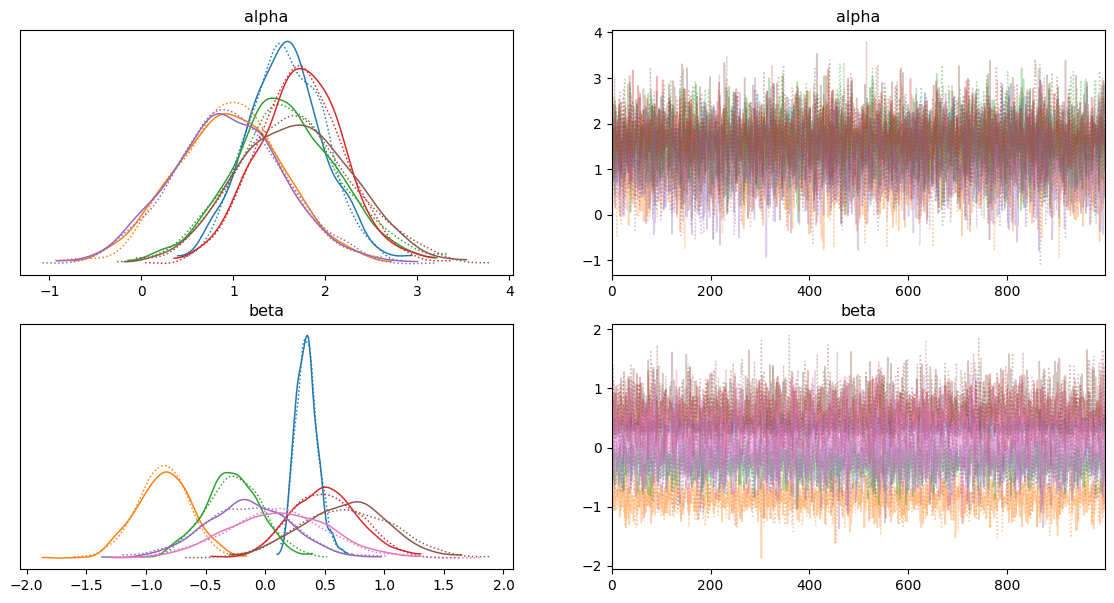

In [ ]:
az.plot_trace(trace_h, figsize=(14, 7))

# **Análise a Posteriori**

In [ ]:
with model_logistic_h:
  trace_post_model_logistic_h = pm.sample_posterior_predictive(trace_h)

Output()

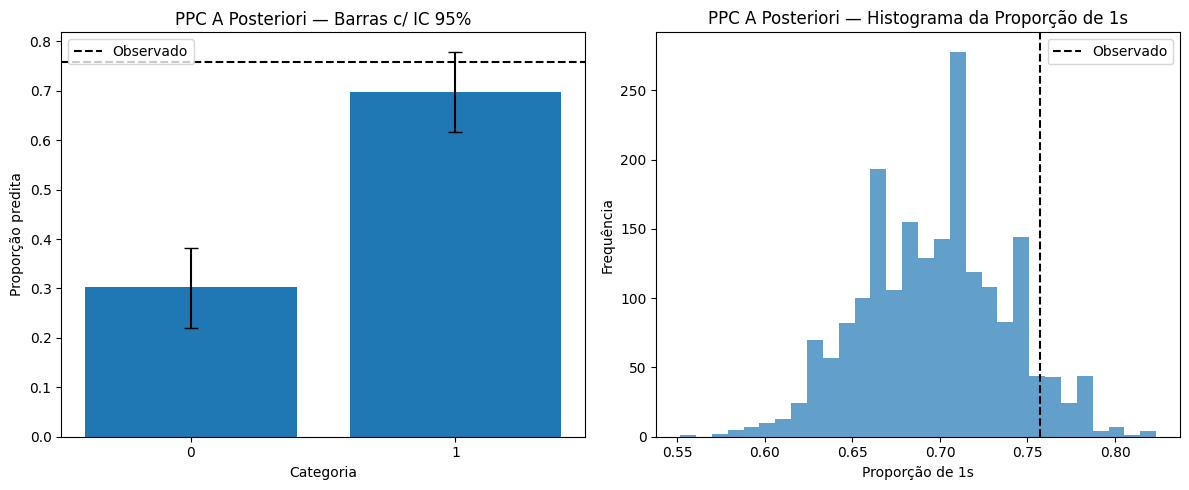

In [ ]:
plot_discrete_ppc(trace_post_model_logistic_h, group="posterior")

No Gráficos de barras a proporção de “1”s sobe para cerca de 70 % (IC ≈ 61 %–78 %), enquanto “0”s ficam em torno de 30 % (IC ≈ 22 %–38 %). Esses intervalos seguem mais estreitos que o prior, mas ainda um pouco mais largos que no modelo totalmente não hierárquico, o modelo confia menos na proporção exata de 75 % e “puxa” suavemente a estimativa em direção a 50 %.

Já na distribuição Monte Carlo do Histograma concentra-se em torno de 0,70, com caudas bastante contidas entre 0,60 e 0,80. A linha pontilhada em ~ 0,76 (valor observado) está próxima à cauda direita da distribuição, indicando que, mesmo após ver os dados, o efeito do prior hierárquico ainda está tendo leve viés para valores centrais.

# **CLASSIFICAÇÃO - REGRESSÃO LOGISTICA COM CLUSTERS NO ALPHA E NOS BETAS**

In [ ]:
with pm.Model(coords=coords_2) as model_logistic_h_2:
  betas = pm.Normal("beta",0,1,dims=("features","clusters"))
  alpha = pm.Normal("alpha",0,1,dims="clusters")

  X = pm.MutableData("X", X_train_filtered[['PC1','PC2','PC3','PC4','PC5','PC6','PC7']].values)

  cluster_index = pm.MutableData("cluster_index", cluster_idx)
  betas_cluster = betas.T[cluster_index]
  y = pm.MutableData("y",y_train.values.squeeze())

  mu = alpha[cluster_index] + tt.sum(X * betas_cluster, axis = 1)
  likelihood = pm.Bernoulli("likelihood",pm.math.invlogit(mu),observed=y)

In [ ]:
model_logistic_h_2

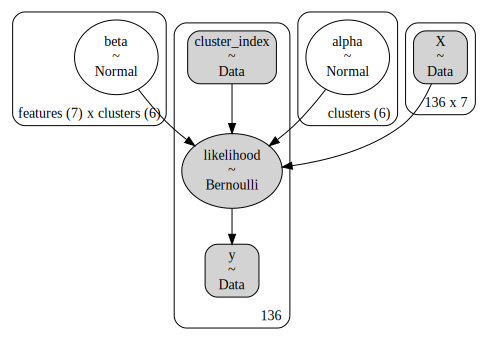

In [ ]:
pm.model_to_graphviz(model_logistic_h_2)

# **Análise a Priori**

In [ ]:
with model_logistic_h_2:
  trace_priori_model_logistic_h_2 = pm.sample_prior_predictive()

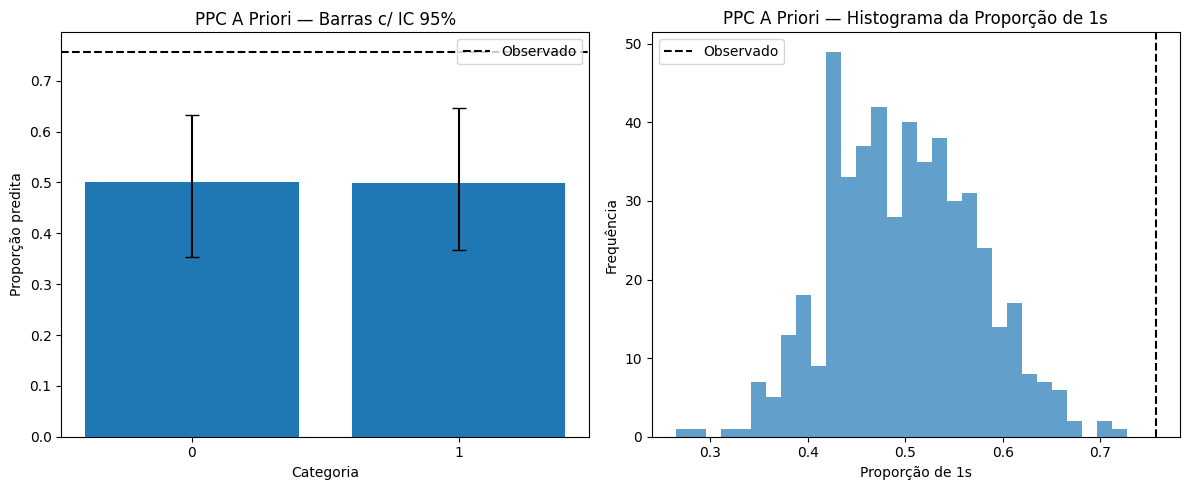

In [ ]:
plot_discrete_ppc(trace_priori_model_logistic_h_2, group="prior")

Nos gráficos da Priori do Modelo com clusters no alpha e betas, não vemos muita mudanças em relação com o que vimos no anterior.

In [ ]:
with model_logistic_h_2:
  trace_h_2 = pm.sample()
pm.summary(trace_h_2)

Output()

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha[1]      1.970  0.535   0.942    2.944      0.012    0.011    1975.0   
alpha[2]      0.575  0.644  -0.690    1.724      0.013    0.013    2593.0   
alpha[3]      1.478  0.738   0.112    2.896      0.013    0.017    2956.0   
alpha[4]      1.968  0.571   0.926    3.060      0.012    0.011    2452.0   
alpha[5]      0.755  0.741  -0.583    2.147      0.015    0.015    2478.0   
alpha[6]      1.207  0.796  -0.245    2.741      0.016    0.016    2377.0   
beta[PC1, 1]  0.634  0.236   0.207    1.069      0.006    0.006    1699.0   
beta[PC1, 2]  0.157  0.386  -0.501    0.902      0.009    0.009    1858.0   
beta[PC1, 3]  0.583  0.302   0.084    1.197      0.008    0.008    1710.0   
beta[PC1, 4]  0.530  0.321  -0.098    1.076      0.007    0.007    2004.0   
beta[PC1, 5]  0.033  0.401  -0.739    0.789      0.009    0.008    1858.0   
beta[PC1, 6] -0.157  0.434  -0.916    0.686      0.010    0.009    2032.0   
beta[PC2, 1] -0.797  0.414  -1.578   -0.017      0.009    0.009    2243.0   
beta[PC2, 2] -1.183  0.684  -2.369    0.165      0.016    0.014    1754.0   
beta[PC2, 3] -0.450  0.615  -1.611    0.715      0.012    0.014    2719.0   
beta[PC2, 4] -0.382  0.604  -1.483    0.754      0.013    0.012    2279.0   
beta[PC2, 5] -1.198  0.758  -2.634    0.163      0.016    0.015    2425.0   
beta[PC2, 6] -1.193  0.727  -2.515    0.197      0.015    0.015    2429.0   
beta[PC3, 1]  0.164  0.429  -0.620    0.981      0.008    0.011    2705.0   
beta[PC3, 2] -0.381  0.657  -1.630    0.839      0.014    0.016    2138.0   
beta[PC3, 3] -0.956  0.716  -2.234    0.422      0.014    0.015    2646.0   
beta[PC3, 4] -0.035  0.526  -0.975    0.980      0.011    0.011    2426.0   
beta[PC3, 5] -0.099  0.683  -1.469    1.064      0.015    0.015    2202.0   
beta[PC3, 6] -0.138  0.732  -1.452    1.316      0.015    0.015    2495.0   
beta[PC4, 1]  0.023  0.460  -0.847    0.843      0.009    0.009    2854.0   
beta[PC4, 2] -0.018  0.788  -1.550    1.424      0.015    0.019    2841.0   
beta[PC4, 3]  0.417  0.810  -1.069    1.914      0.015    0.018    2858.0   
beta[PC4, 4]  0.968  0.655  -0.213    2.209      0.012    0.014    2977.0   
beta[PC4, 5]  0.578  0.894  -1.165    2.140      0.017    0.021    2964.0   
beta[PC4, 6]  0.569  0.709  -0.742    1.922      0.014    0.015    2720.0   
beta[PC5, 1] -0.712  0.595  -1.845    0.359      0.012    0.013    2414.0   
beta[PC5, 2]  0.833  0.823  -0.656    2.409      0.016    0.019    2619.0   
beta[PC5, 3]  0.410  0.832  -1.139    1.982      0.015    0.018    2869.0   
beta[PC5, 4] -0.181  0.692  -1.521    1.078      0.013    0.016    2755.0   
beta[PC5, 5] -0.448  0.848  -2.032    1.131      0.017    0.019    2486.0   
beta[PC5, 6] -0.087  0.810  -1.605    1.467      0.018    0.017    2157.0   
beta[PC6, 1]  0.882  0.540  -0.156    1.876      0.010    0.012    3111.0   
beta[PC6, 2]  0.051  0.778  -1.331    1.576      0.015    0.018    2717.0   
beta[PC6, 3] -0.021  0.878  -1.623    1.600      0.016    0.019    2970.0   
beta[PC6, 4]  0.190  0.720  -1.238    1.460      0.014    0.016    2810.0   
beta[PC6, 5]  0.551  0.857  -0.875    2.306      0.017    0.019    2454.0   
beta[PC6, 6]  0.157  0.974  -1.689    1.941      0.019    0.024    2633.0   
beta[PC7, 1]  0.127  0.676  -1.088    1.384      0.013    0.016    2692.0   
beta[PC7, 2]  0.208  0.886  -1.297    2.012      0.016    0.019    2926.0   
beta[PC7, 3] -0.255  0.894  -2.039    1.337      0.016    0.021    3245.0   
beta[PC7, 4]  0.137  0.711  -1.037    1.637      0.015    0.014    2310.0   
beta[PC7, 5] -0.144  0.909  -1.844    1.541      0.018    0.021    2588.0   
beta[PC7, 6] -0.307  0.930  -2.119    1.381      0.017    0.021    3064.0   

              ess_tail  r_hat  
alpha[1]        1531.0    1.0  
alpha[2]        1662.0    1.0  
alpha[3]        1657.0    1.0  
alpha[4]        1702.0    1.0  
alpha[5]        1801.0    1.0  
alpha[6]        1565.0    1.0  
beta[PC1, 1]    1

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

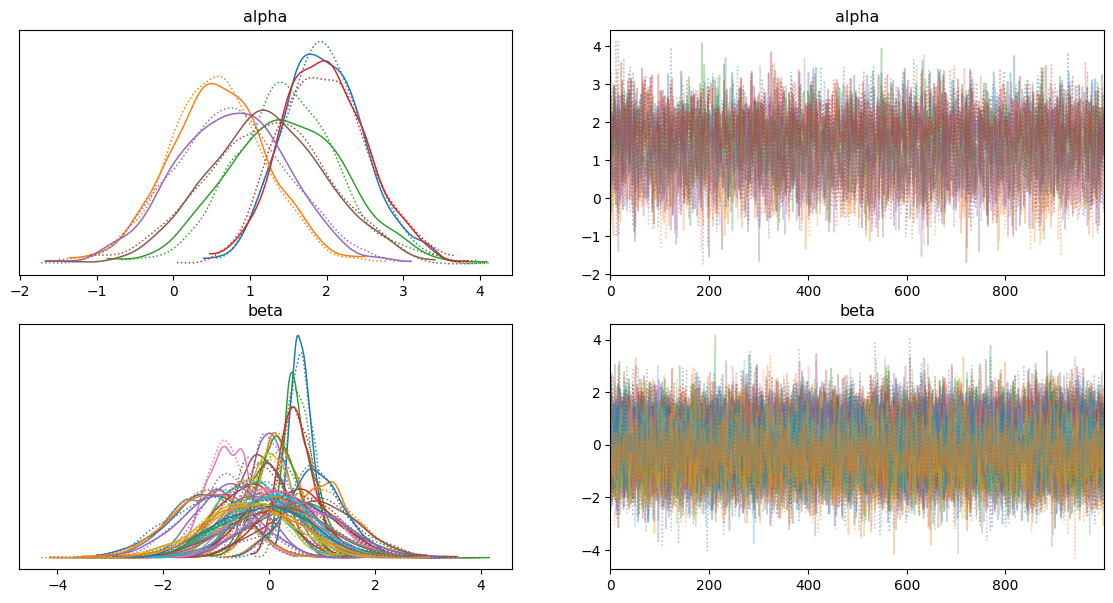

In [ ]:
az.plot_trace(trace_h_2, figsize=(14, 7))

# **Análise a Posteriori**

In [ ]:
with model_logistic_h_2:
  trace_post_model_logistic_h_2 = pm.sample_posterior_predictive(trace_h_2)

Output()

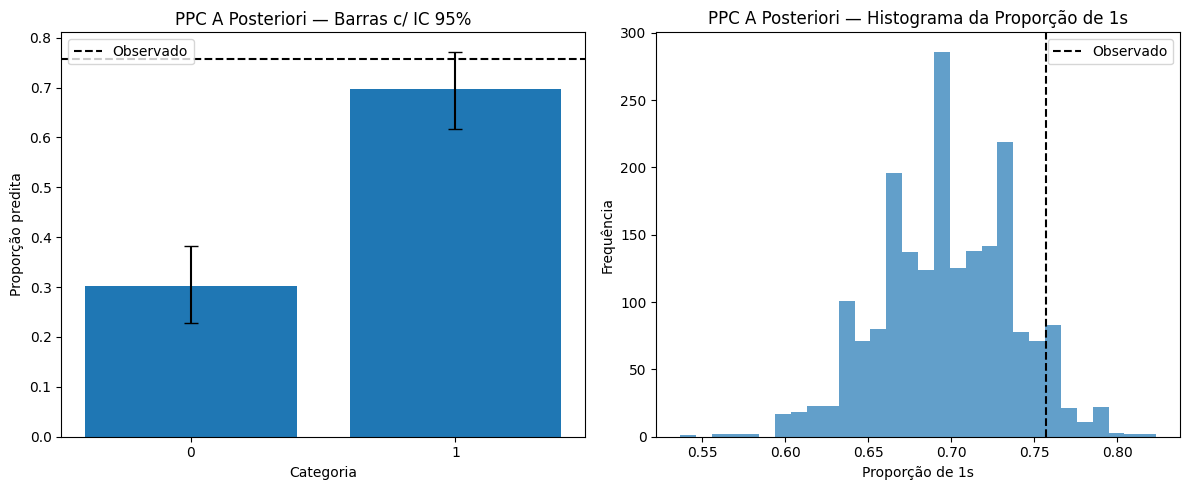

In [ ]:
plot_discrete_ppc(trace_post_model_logistic_h_2, group="posterior")

O mesmo ocorre na Posteriori com pequenas mudanças no histograma em comparação com o anterior mas no gráfico de barras a proporção de “1”s sobe novamente para cerca de 70 % enquanto “0”s ficam em torno de 30 %.

# **CLASSIFICAÇÃO  - MODELO GAUSSIANO COM A FUNÇÃO DE COVARIÂNCIA EXPONENCIAL QUADRÁTICA**

In [ ]:
Y = y_train.values.squeeze()

In [ ]:
with pm.Model() as model_gp_exp_q:
    l = pm.HalfNormal("l0", 1)
    cov = pm.gp.cov.ExpQuad(7, ls=l)
    gp = pm.gp.Latent(cov_func=cov)

    l1 = pm.HalfNormal("l1", 1)
    cov1 = pm.gp.cov.ExpQuad(7, ls=l1)
    gp1 = pm.gp.Latent(cov_func=cov1)

    s = pm.HalfNormal("s0", sigma=1, shape=2)

    f = gp.prior("f", X= X_train_filtered.values)
    g = gp1.prior("g", X= X_train_filtered.values)

    fs = pm.math.stack([f, g], axis=1)
    j = pm.Deterministic("j", fs)
    p = pm.Deterministic("p", pm.math.softmax(fs,axis=1))

    likelihood = pm.Categorical("likelihood", p=p, observed=Y)

In [ ]:
model_gp_exp_q

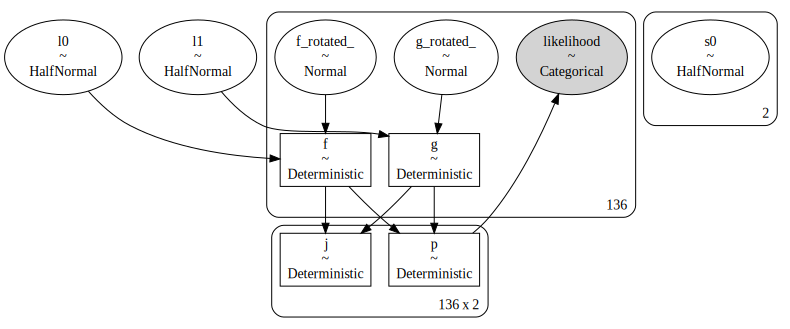

In [ ]:
pm.model_to_graphviz(model_gp_exp_q)

# **Análise a Priori**

In [ ]:
with model_gp_exp_q:
  trace_priori_model_gp_exp_q = pm.sample_prior_predictive()

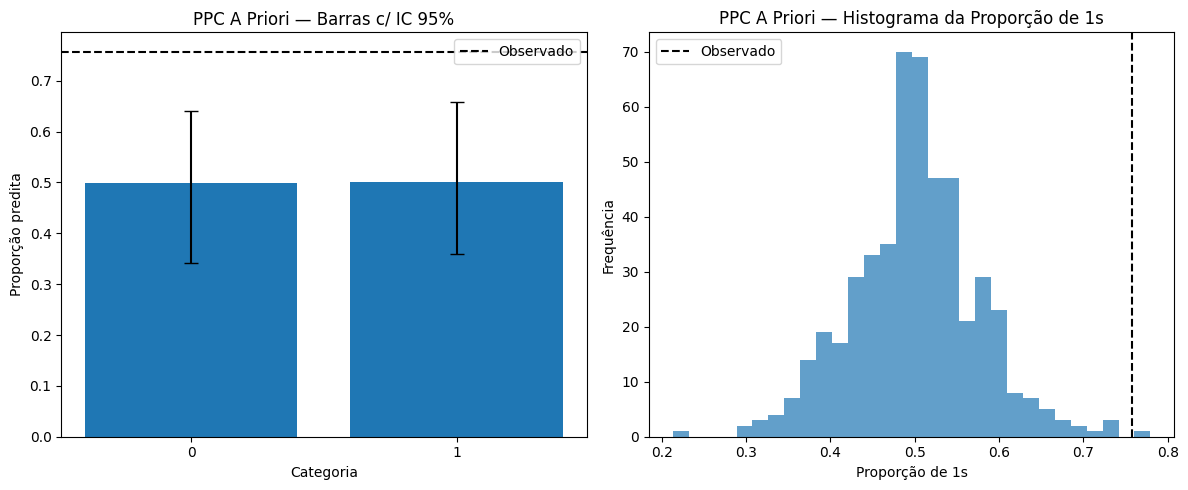

In [ ]:
plot_discrete_ppc(trace_priori_model_gp_exp_q, group="prior")

Basicamente segue muito próxima a priori dos modelos anteriores com as classes com proporções de 50, 50 e alto intervalo de confiança no gráfico de barras.

No histograma vemos as mesma semelhança em relação aos dos outros modelos.

In [ ]:
with model_gp_exp_q:
  trace_approx_gp_exp_q = pm.fit(20000)

Output()

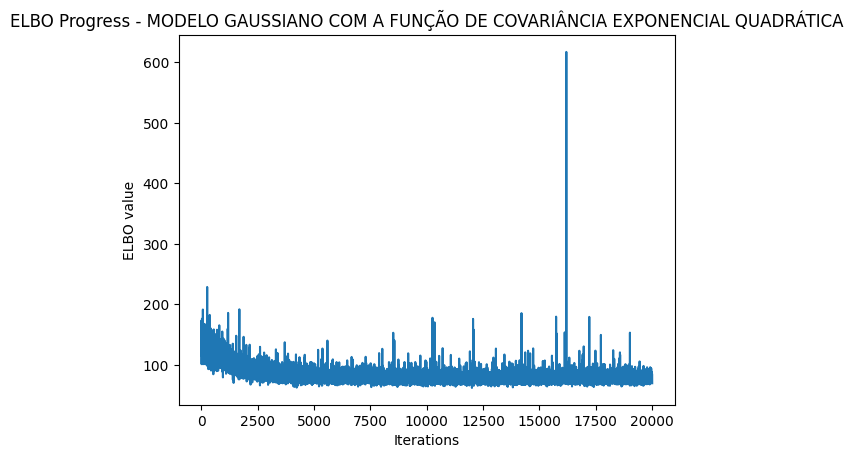

In [ ]:
plt.plot(trace_approx_gp_exp_q.hist)
plt.title('ELBO Progress - MODELO GAUSSIANO COM A FUNÇÃO DE COVARIÂNCIA EXPONENCIAL QUADRÁTICA')
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.show()

In [ ]:
with model_gp_exp_q:
  trace_gp_exp_q = trace_approx_gp_exp_q.sample(10000)
pm.summary(trace_gp_exp_q)

Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
f[0]      -0.477  0.463  -1.341    0.396      0.005    0.003   10161.0   
f[1]       0.283  0.627  -0.872    1.498      0.006    0.005    9858.0   
f[2]      -0.087  0.606  -1.203    1.066      0.006    0.004    9842.0   
f[3]      -0.341  0.641  -1.523    0.872      0.006    0.005    9775.0   
f[4]      -1.615  0.759  -2.991   -0.168      0.008    0.005    9687.0   
...          ...    ...     ...      ...        ...      ...       ...   
p[134, 1]  0.870  0.112   0.664    0.995      0.001    0.001    9636.0   
p[135, 0]  0.369  0.249   0.009    0.810      0.002    0.001   10207.0   
p[135, 1]  0.631  0.249   0.190    0.991      0.002    0.001   10207.0   
s0[0]      1.004  1.251   0.028    2.797      0.012    0.060    9913.0   
s0[1]      0.939  1.056   0.023    2.595      0.011    0.029    9886.0   

           ess_tail  r_hat  
f[0]         9877.0    NaN  
f[1]         9398.0    NaN  
f[2]         9636.0    NaN  
f[3]         9538.0    NaN  
f[4]         9637.0    NaN  
...             ...    ...  
p[134, 1]    9338.0    NaN  
p[135, 0]    9800.0    NaN  
p[135, 1]    9800.0    NaN  
s0[0]        9838.0    NaN  
s0[1]       10198.0    NaN  

[1092 rows x 9 columns]

array([[<Axes: title={'center': 'f'}>, <Axes: title={'center': 'f'}>],
       [<Axes: title={'center': 'f_rotated_'}>,
        <Axes: title={'center': 'f_rotated_'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'g'}>],
       [<Axes: title={'center': 'g_rotated_'}>,
        <Axes: title={'center': 'g_rotated_'}>],
       [<Axes: title={'center': 'j'}>, <Axes: title={'center': 'j'}>],
       [<Axes: title={'center': 'l0'}>, <Axes: title={'center': 'l0'}>],
       [<Axes: title={'center': 'l1'}>, <Axes: title={'center': 'l1'}>],
       [<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>],
       [<Axes: title={'center': 's0'}>, <Axes: title={'center': 's0'}>]],
      dtype=object)

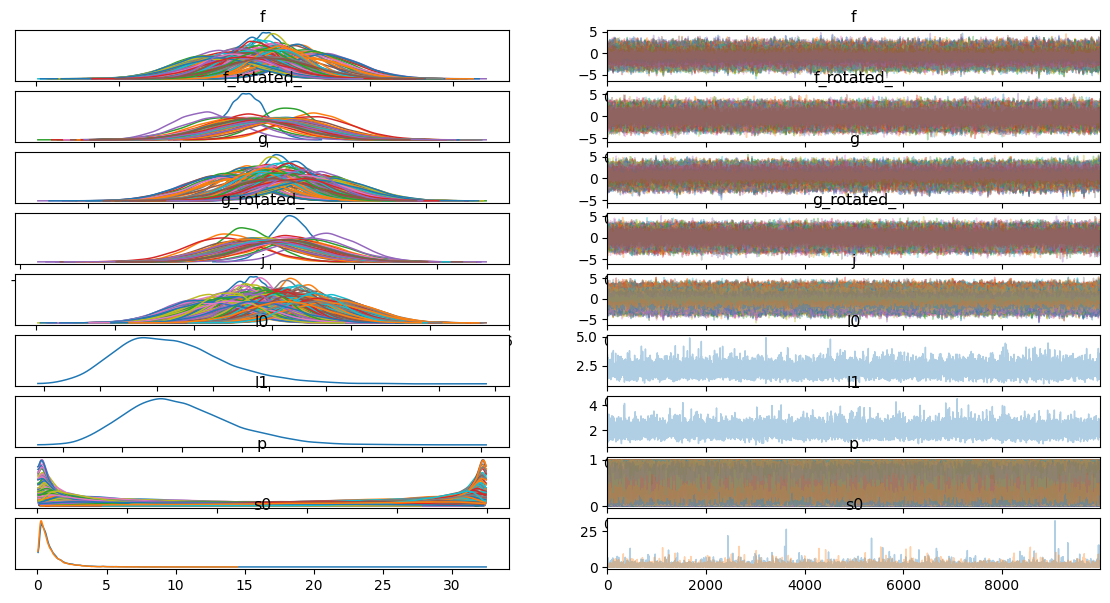

In [ ]:
az.plot_trace(trace_gp_exp_q, figsize=(14, 7))

# **Análise a Posteriori**

In [ ]:
with model_gp_exp_q:
  trace_post_model_gp_exp_q = pm.sample_posterior_predictive(trace_gp_exp_q)

Output()

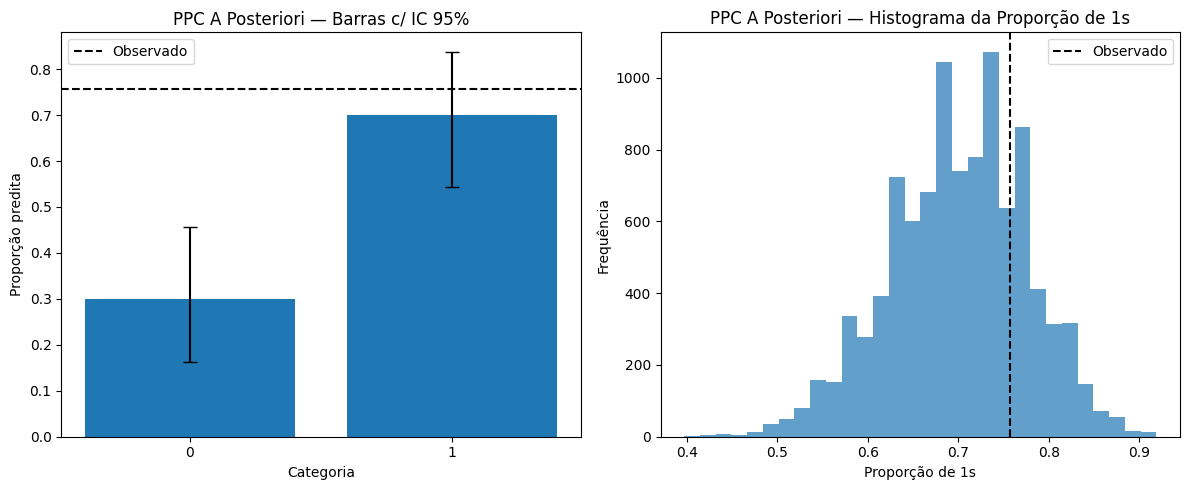

In [ ]:
plot_discrete_ppc(trace_post_model_gp_exp_q, group="posterior")

 No gráfico de barras, as proporções preditas para as categorias 0 e 1 se aproximam bem da proporção observada e ainda estão em 70% categoria 1 e 30% categoria 0, com os intervalos de credibilidade relativamente estreitos, mostrando que o modelo está confiante em suas previsões. Já no histograma, a distribuição das proporções de 1s geradas pelo modelo cobre a proporção observada (linha tracejada), que está bem centralizada na massa da distribuição (aproximadamente 75%). Isso sugere que o modelo está gerando réplicas consistentes com os dados observados

# **CLASSIFICAÇÃO  - MODELO GAUSSIANO COM A FUNÇÃO DE COVARIÂNCIA MATÉRN 3/2**

In [ ]:
with pm.Model() as model_gp_matern32:
    l = pm.HalfNormal("l0", 1)
    cov = pm.gp.cov.Matern32(7, ls=l)
    gp = pm.gp.Latent(cov_func=cov)

    l1 = pm.HalfNormal("l1", 1)
    cov1 = pm.gp.cov.Matern32(7, ls=l1)
    gp1 = pm.gp.Latent(cov_func=cov1)

    s = pm.HalfNormal("s0", sigma=1, shape=2)

    f = gp.prior("f", X= X_train_filtered.values)
    g = gp1.prior("g", X= X_train_filtered.values)

    fs = pm.math.stack([f, g], axis=1)
    j = pm.Deterministic("j", fs)
    p = pm.Deterministic("p", pm.math.softmax(fs,axis=1))

    likelihood = pm.Categorical("likelihood", p=p, observed=Y)

In [ ]:
model_gp_matern32

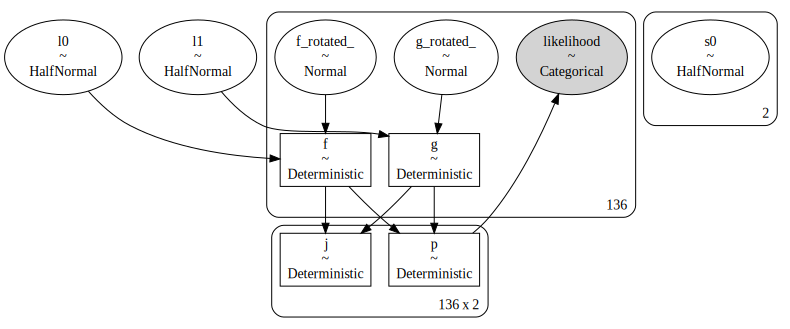

In [ ]:
pm.model_to_graphviz(model_gp_matern32)

# **Análise a Priori**

In [ ]:
with model_gp_matern32:
  trace_priori_model_gp_matern32 = pm.sample_prior_predictive()

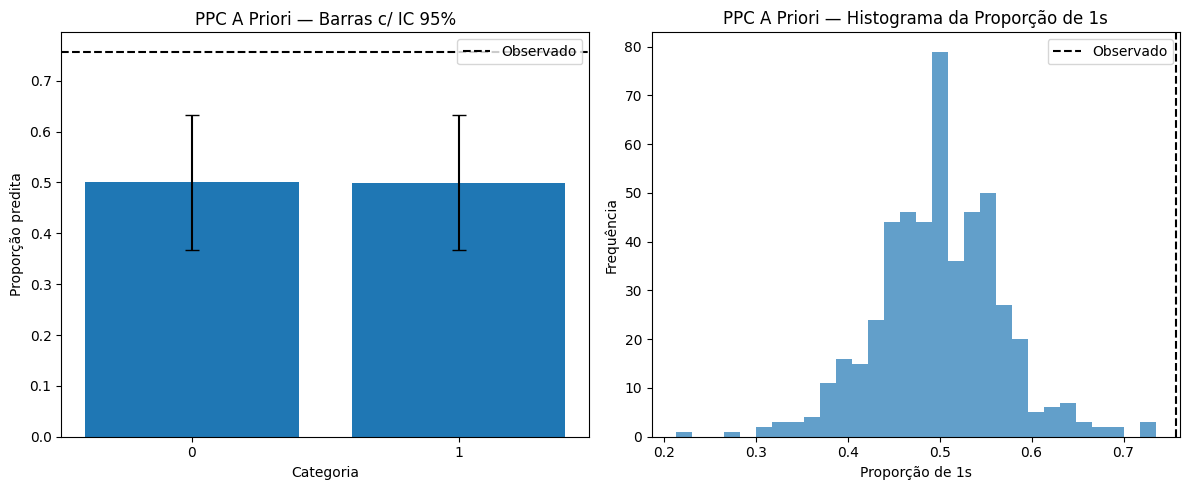

In [ ]:
plot_discrete_ppc(trace_priori_model_gp_matern32, group="prior")

A priori desse modelo segue quase os mesmo padrões dos outros modelos

In [ ]:
with model_gp_matern32:
  trace_approx_gp_matern32 = pm.fit(20000)

Output()

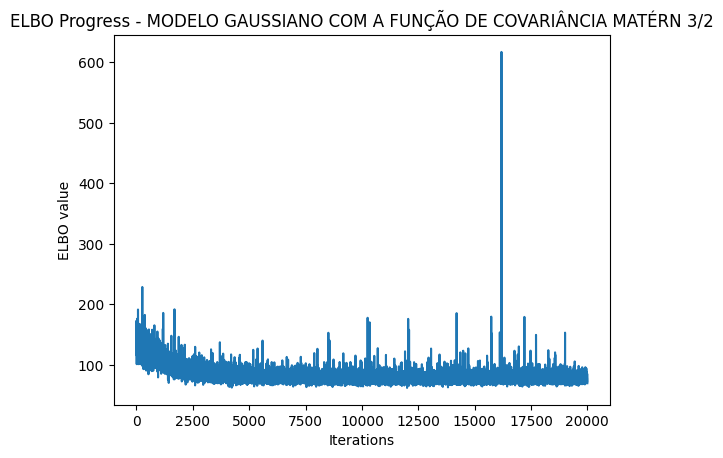

In [ ]:
plt.plot(trace_approx_gp_exp_q.hist)
plt.title('ELBO Progress - MODELO GAUSSIANO COM A FUNÇÃO DE COVARIÂNCIA MATÉRN 3/2')
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.show()

In [ ]:
with model_gp_matern32:
  trace_gp_matern32 = trace_approx_gp_matern32.sample(10000)
pm.summary(trace_gp_matern32)

Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
f[0]      -0.642  0.521  -1.635    0.330      0.005    0.004   10104.0   
f[1]       0.330  0.753  -1.088    1.726      0.008    0.006    9799.0   
f[2]       0.100  0.621  -1.050    1.268      0.006    0.005    9857.0   
f[3]      -0.495  0.733  -1.868    0.851      0.008    0.005    9228.0   
f[4]      -1.477  0.830  -3.000    0.096      0.008    0.006    9791.0   
...          ...    ...     ...      ...        ...      ...       ...   
p[134, 1]  0.865  0.130   0.616    0.997      0.001    0.002    9899.0   
p[135, 0]  0.359  0.250   0.006    0.808      0.002    0.001   10243.0   
p[135, 1]  0.641  0.250   0.192    0.994      0.002    0.001   10243.0   
s0[0]      0.942  1.075   0.037    2.572      0.011    0.030   10372.0   
s0[1]      0.932  1.056   0.021    2.518      0.011    0.033    9458.0   

           ess_tail  r_hat  
f[0]         9595.0    NaN  
f[1]         9399.0    NaN  
f[2]         9478.0    NaN  
f[3]         9354.0    NaN  
f[4]         9963.0    NaN  
...             ...    ...  
p[134, 1]    9611.0    NaN  
p[135, 0]    9602.0    NaN  
p[135, 1]    9602.0    NaN  
s0[0]        9923.0    NaN  
s0[1]        9879.0    NaN  

[1092 rows x 9 columns]

# **Análise a Posteriori**

In [ ]:
with model_gp_matern32:
  trace_post_model_gp_matern32 = pm.sample_posterior_predictive(trace_gp_matern32)

Output()

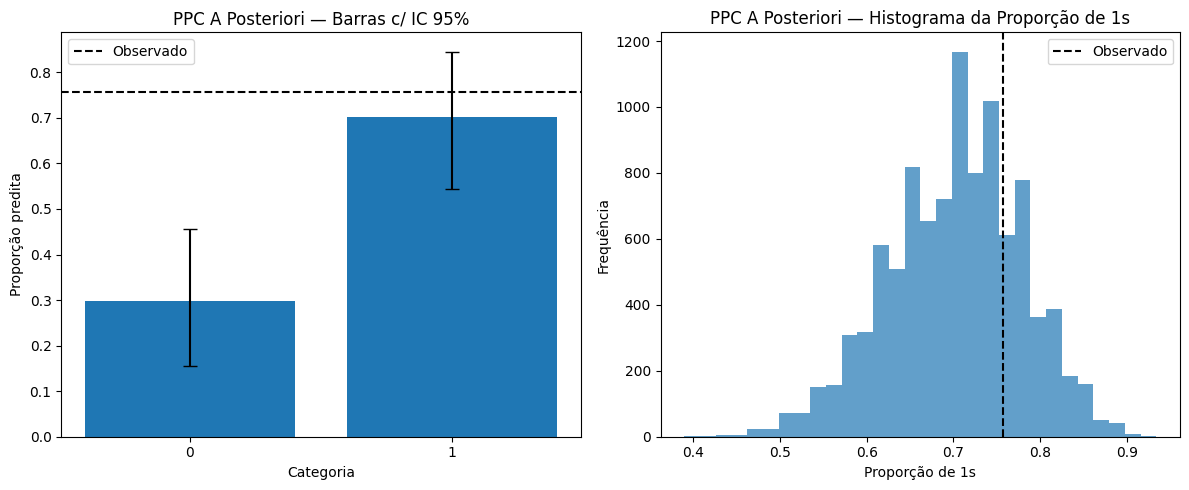

In [ ]:
plot_discrete_ppc(trace_post_model_gp_matern32, group="posterior")


A posteriori desse último modelo também segue o padrão dos outros modelos tanto no gráfico de barras quanto no histograma com pequenas diferenças.

# **Comparação/Modelo Vencedor**

In [ ]:
with model_logistic:
    pm.compute_log_likelihood(trace)

with model_logistic_h:
    pm.compute_log_likelihood(trace_h)

with model_logistic_h_2:
    pm.compute_log_likelihood(trace_h_2)

with model_gp_exp_q:
    pm.compute_log_likelihood(trace_gp_exp_q)

with model_gp_matern32:
    pm.compute_log_likelihood(trace_gp_matern32)

Output()

Output()

Output()

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

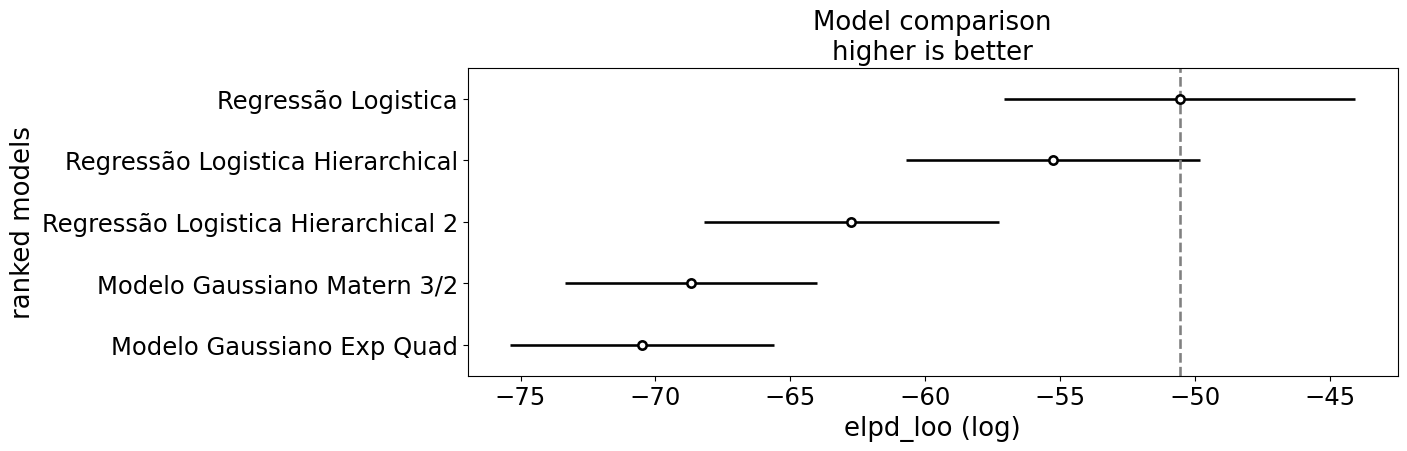

In [ ]:
model_compare = az.compare(
    {
        "Regressão Logistica": trace,
        "Regressão Logistica Hierarchical": trace_h,
        "Regressão Logistica Hierarchical 2": trace_h_2,
        "Modelo Gaussiano Exp Quad": trace_gp_exp_q,
        "Modelo Gaussiano Matern 3/2": trace_gp_matern32
    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [ ]:
model_compare

rank   elpd_loo      p_loo  elpd_diff  \
Regressão Logistica                    0 -50.579761   6.053878   0.000000   
Regressão Logistica Hierarchical       1 -55.258539   7.703112   4.678779   
Regressão Logistica Hierarchical 2     2 -62.747605  18.627239  12.167844   
Modelo Gaussiano Matern 3/2            3 -68.679017  24.063041  18.099256   
Modelo Gaussiano Exp Quad              4 -70.501269  22.670645  19.921508   

                                      weight        se       dse  warning  \
Regressão Logistica                 0.946218  6.511441  0.000000     True   
Regressão Logistica Hierarchical    0.052471  5.449314  2.156899    False   
Regressão Logistica Hierarchical 2  0.001238  5.459767  3.368231     True   
Modelo Gaussiano Matern 3/2         0.000068  4.671397  3.931313    False   
Modelo Gaussiano Exp Quad           0.000005  4.896190  3.626387    False   

                                   scale  
Regressão Logistica                  log  
Regressão Logistica Hierarchical     log  
Regressão Logistica Hierarchical 2   log  
Modelo Gaussiano Matern 3/2          log  
Modelo Gaussiano Exp Quad            log

**Regressão Logistica** foi o vencedor, iremos continuar com ele para o teste

# **TESTE**

In [ ]:
X_test_filtered = X_test.drop(['Cluster'],axis =1)
display(X_test_filtered)

PC1       PC2       PC3       PC4       PC5       PC6       PC7
138  1.311715 -2.603788  1.348830 -0.236738  1.340564 -0.402097  0.403519
16  -1.077142  0.694440  0.226779  1.865724 -0.234050 -0.669480 -0.280890
155  0.369070 -0.674425 -0.852908  0.476456  0.808111  0.168717 -0.838507
96  -1.457167 -0.498207  1.168249 -0.778382  0.360673  0.075706  0.196239
68   3.327616 -0.074195 -0.240112 -1.158719  0.576260 -1.564963 -0.198998
153  0.449970  0.339395 -1.236720  0.170276  0.876242  0.002950  0.008915
55   1.024786 -1.440191 -1.611263 -0.377693 -1.158437 -0.316462 -0.503051
15  -2.239256  0.130166 -0.650494  1.123373  0.240707 -0.157420 -0.457784
112  0.352223  0.757373 -0.131133 -0.351894 -1.512308  1.026249 -1.098364
111 -1.396887  1.477916  0.429406 -0.895152 -1.005036  0.982819 -0.360709
184 -1.095893  0.057584 -0.987429  1.013725  0.001741 -0.212919 -0.874094
18   2.893804 -2.814764  1.062030  1.297746  0.260897  0.533079 -0.288840
82  -0.337739 -0.802209 -1.548626 -0.318611 -0.116597 -0.192983 -0.638343
9   -0.343407 -1.682940 -1.184831  0.389006 -0.318172  0.311936  0.537206
164  2.179713 -0.947567 -1.959903  1.811069  0.014808  1.090099 -0.463906
117 -0.981010  0.890875  0.657439  3.421067 -1.316294  0.286077  0.403929
69   1.580994 -0.884463  0.742147 -1.396415  0.681642 -1.874266 -0.246764
113 -1.603834  0.975736  0.295985 -0.112462 -1.001119  1.151439 -0.183364
192  3.459207  3.667992 -0.956688  0.189662  1.439171 -0.142393  0.443812
119 -2.451732  0.381868  0.384001  2.170794  0.316952  1.602617 -0.061418
123  0.531336  0.434610 -0.835647 -0.107484 -0.371642 -0.564323 -1.317882
144 -2.102877  0.202910  1.691227  0.348058  0.592055  0.622646 -0.352515
66   0.858326 -0.415765 -0.716770 -0.020030 -0.088157 -0.415406 -0.361337
45  -3.336166  1.826744  1.609675 -0.814004 -0.029553  0.796141 -0.663180
158  1.924455  0.409204 -1.254643  0.816076  0.416303  0.803942 -0.753463
115  0.978802  2.688324  0.037731  3.048076 -0.885209 -0.638980  0.486423
67   1.302361 -0.078551 -1.084595 -0.064672 -0.205727 -0.533936 -0.505006
93   0.436078 -2.333683  2.172787 -1.179586  1.033883 -1.775926  0.166218
30  -3.458526  1.414832  0.178395 -1.159007 -0.447661  0.275766  0.434371
101  8.421259  0.339743 -0.783784  0.201411  1.151104  0.102475 -0.061929
118 -1.957904  0.876061  0.693285  3.449441 -1.185443  0.343792  0.434193
75  -1.254585 -0.982603 -1.459136 -0.265260 -0.687175  0.011955  0.848144
24  -0.585146  0.716899 -1.063379  0.542433 -0.633778  0.298720 -0.199385
172 -2.662624 -0.211657 -1.363466 -0.683100 -0.123369 -0.284081  0.611729
127 -0.134747  0.015601 -0.281774 -0.311071  0.149456 -1.056406 -0.981118
169 -1.771783  2.042788  1.405703 -1.453435 -0.356642  0.422001 -1.078473
19   1.733036 -1.082552  0.523450  0.954500  0.083363  1.284279 -0.374665
168  0.052372  0.883028 -0.298085  0.063538 -0.789695  0.228282 -1.020574
73  -0.883193  0.892940  1.027641  2.555539 -2.687776 -2.036713  0.989182
5    2.470177 -2.148167 -0.714585 -0.814807 -1.969977 -0.133014  0.051235
135  0.614508 -1.887089  0.369137  0.410051  1.017272  0.334269  0.221393
122  1.220389 -1.026697  0.392226 -0.490979 -0.008000 -1.376620 -0.562850
167 -2.500020  1.893543  1.955024 -1.179414 -0.050226  0.567694 -0.528116
85   0.128586 -0.968232  1.665767  0.488859  0.674643  1.149111  0.262271
56   0.879558 -1.828616 -1.162005 -0.493916 -1.115613 -0.512818 -0.183051
95  -1.335296 -0.474327  0.882724 -0.793777  0.403742  0.029804 -0.051563
35  -3.912182  1.453054  0.745964 -1.105538 -0.382665  0.693149  0.914374
190 -0.007306  0.019044  1.641397 -0.310666  1.074956 -0.927405 -0.350943
42  -2.861978  1.889896  1.705422 -1.222716 -0.182858  0.701706 -0.479808
65  -3.266764  1.521297  0.977215 -0.999250  0.269242 -0.953888 -0.702770
104 -3.998885  1.003141 -0.235616 -0.803765  0.265870 -0.041319  0.529736
159  0.192606 -0.550546 -0.463093  0.043355  0.769658  0.023153 -0.408231
78  -0.033146 -1.599265 -1.331940 -0.217738  0.026382 -0.388257 -0.077943
76  -0.241731 

In [ ]:
with model_logistic:
  vars_test = {
      "X_"+column: X_test_filtered[column].values.squeeze()
      for column in X_test_filtered.columns if np.issubdtype(x_f_pca[column].dtype, np.number)
  }
  vars_test["y"] = y_test.values.squeeze()
  pm.set_data(vars_test)
  trace_post = pm.sample_posterior_predictive(trace)

Output()

In [ ]:
mean_likelihood = trace_post.posterior_predictive['likelihood'].mean(dim=['chain', 'draw'])
pred = (mean_likelihood > 0.5).astype(int)

In [ ]:
y_test_flat = y_test.squeeze()
pred_flat = pred.squeeze()

abs_diff = np.abs(y_test_flat - pred_flat)

df_testes_b = pd.DataFrame({
    'y_teste': y_test_flat,
    'Pred_modelo': pred_flat,
    'abs_diff': abs_diff
})

display(df_testes_b)

y_teste  Pred_modelo  abs_diff
138        1            1         0
16         1            1         0
155        1            1         0
96         1            1         0
68         1            1         0
153        1            1         0
55         1            1         0
15         1            1         0
112        1            1         0
111        1            1         0
184        0            1         1
18         1            1         0
82         1            1         0
9          1            1         0
164        1            1         0
117        1            1         0
69         1            1         0
113        1            1         0
192        0            0         0
119        1            1         0
123        1            1         0
144        1            1         0
66         1            1         0
45         0            0         0
158        1            1         0
115        1            1         0
67         1            1         0
93         1            1         0
30         0            0         0
101        1            1         0
118        1            1         0
75         1            1         0
24         1            1         0
172        0            1         1
127        1            1         0
169        0            0         0
19         1            1         0
168        0            1         1
73         1            1         0
5          1            1         0
135        1            1         0
122        1            1         0
167        0            0         0
85         1            1         0
56         1            1         0
95         1            1         0
35         0            0         0
190        0            1         1
42         0            0         0
65         0            0         0
104        1            0         1
159        1            1         0
78         1            1         0
76         1            1         0
29         1            1         0
136        1            1         0
60         0            0         0
51         0            1         1
165        0            0         0

# **Matriz de Confusão - Regressão Logística Bayesiana**

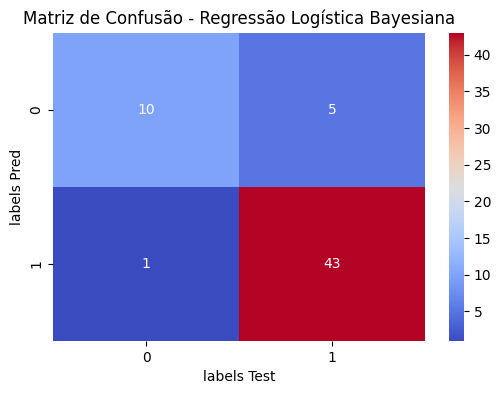

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_flat, pred_flat)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title("Matriz de Confusão - Regressão Logística Bayesiana")
plt.xlabel('labels Test')
plt.ylabel('labels Pred')
plt.show()

# **Métricas da Regressão Logística Bayesiana**

In [ ]:
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             precision_score, recall_score,f1_score,
                             cohen_kappa_score)
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import binomtest
from statsmodels.stats.contingency_tables import mcnemar

errors = df_testes_b ['abs_diff'].sum()
accuracy = (len(df_testes_b)-errors)/len(df_testes_b)

n = len(y_test_flat)

cm = confusion_matrix(y_test_flat, pred_flat)
TN, FP, FN, TP = cm.ravel()


ci_low, ci_upp = proportion_confint(count=int(accuracy * n), nobs=n, alpha=0.05, method='wilson')

classes, counts = np.unique(y_test_flat, return_counts=True)
NIR = np.max(counts) / n

result_binom = binomtest(k=int(accuracy * n), n=n, p=NIR, alternative='greater')
p_value_acc_gt_NIR = result_binom.pvalue

kappa = cohen_kappa_score(y_test_flat, pred_flat)

sensitivity = TP / (TP + FN) if (TP + FN) > 0 else np.nan

specificity = TN / (TN + FP) if (TN + FP) > 0 else np.nan

pos_pred_value = precision_score(y_test_flat, pred_flat)


f1 = f1_score(y_test_flat, pred_flat)

neg_pred_value = TN / (TN + FN) if (TN + FN) > 0 else np.nan

prevalence = np.sum(y_test_flat == 1) / n

detection_rate = TP / n

detection_prevalence = (TP + FP) / n

balanced_accuracy = balanced_accuracy_score(y_test_flat, pred_flat)

table_mcnemar = [[0, FP],
                 [FN, 0]]
result_mcnemar = mcnemar(table_mcnemar, exact=True)
mcnemar_p_value = result_mcnemar.pvalue
print("================================== Métricas da Regressão Logística Bayesiana  ==================================")
print(f"Acurácia no conjunto de teste: {accuracy*100:.2f}%")
print(f"\nErros no conjunto de teste: {errors}")
print("\n95% CI da Acurácia: [{:.3f}, {:.3f}]".format(ci_low, ci_upp))
print("\nNo Information Rate: {:.3f}".format(NIR))
print("\nP-Value [Acc > NIR]: {:.3f}".format(p_value_acc_gt_NIR))
print("\nKappa: {:.3f}".format(kappa))
print("\nMcnemar's Test P-Value: {:.3f}".format(mcnemar_p_value))
print("\nSensitivity (Recall): {:.3f}".format(sensitivity))
print("\nSpecificity: {:.3f}".format(specificity))
print("\nPos Pred Value (Precision): {:.3f}".format(pos_pred_value))
print(f"\nF1 Score: {f1:.3f}")
print("\nNeg Pred Value: {:.3f}".format(neg_pred_value))
print("\nPrevalence: {:.3f}".format(prevalence))
print("\nDetection Rate: {:.3f}".format(detection_rate))
print("\nDetection Prevalence: {:.3f}".format(detection_prevalence))
print("\nBalanced Accuracy: {:.3f}".format(balanced_accuracy))

================================== Métricas da Regressão Logística Bayesiana  ==================================
Acurácia no conjunto de teste: 89.83%

Erros no conjunto de teste: 6

95% CI da Acurácia: [0.795, 0.953]

No Information Rate: 0.746

P-Value [Acc > NIR]: 0.003

Kappa: 0.706

Mcnemar's Test P-Value: 0.219

Sensitivity (Recall): 0.977

Specificity: 0.667

Pos Pred Value (Precision): 0.896

F1 Score: 0.935

Neg Pred Value: 0.909

Prevalence: 0.746

Detection Rate: 0.729

Detection Prevalence: 0.814

Balanced Accuracy: 0.822


Os resultados obtidos no conjunto de teste indicam que, mesmo com um volume de dados relativamente pequeno (197 observações), o modelo apresenta desempenho robusto. A acurácia de 89,83% (IC 95% [0,795; 0,953]) supera de forma significativa a No Information Rate de 74,6%, com p‑valor de 0,003, o que demonstra que o ajuste não se deve ao acaso. O coeficiente Kappa de 0,706 reforça a concordância substancial entre as previsões e as classes reais, indicando que o modelo vai além de simples acertos por frequência de classe.

A sensibilidade de 97,7% revela que o modelo é extremamente eficaz em identificar corretamente os casos positivos de Parkinson, o que é crucial em aplicações médicas onde minimizar falsos negativos é prioridade. Por outro lado, a especificidade de 66,7% mostra que há espaço para aprimorar a detecção de casos negativos, reduzindo falsos positivos. A balanced accuracy de 82,2% equilibra esses dois aspectos, confirmando um bom equilíbrio entre sensibilidade e especificidade num cenário de classes desbalanceadas (prevalência de 74,6%).

Em suma, o modelo logistico bayesiano demonstrou alto potencial diagnóstico, com excelente recall e precisão (F1 de 0,935).

Agora, vamos avaliar dois dos modelos de classificação Frequentistas o Random Forest e o XGBoost, em seguida, comparar seus resultados com o modelo bayesiano campeão: Regressão logística.

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 13.8 MB/s eta 0:00:00


# **Random Forest**

**Função para encontrar os Melhores parâmetros para o RandomForest**

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }
    clf = RandomForestClassifier(**params, random_state=42)
    return cross_val_score(clf, X_train_filtered, y_train, cv=5, scoring='roc_auc').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Melhores parâmetros para o RandomForest:", study.best_params)

[I 2025-07-04 01:12:27,264] A new study created in memory with name: no-name-07c219aa-5a46-4330-82a1-534db6672d15
[I 2025-07-04 01:12:35,766] Trial 0 finished with value: 0.9119274376417235 and parameters: {'n_estimators': 326, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.9119274376417235.
[I 2025-07-04 01:12:48,788] Trial 1 finished with value: 0.9267120181405897 and parameters: {'n_estimators': 281, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: 0.9267120181405897.
[I 2025-07-04 01:13:04,671] Trial 2 finished with value: 0.9163038548752835 and parameters: {'n_estimators': 396, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 1 with value: 0.9267120181405897.
[I 2025-07-04 01:13:15,755] Trial 3 finished with value: 0.926485260770975 and parameters: {'n_estimators': 297, 'max_depth': 14, 'mi

Melhores parâmetros para o RandomForest: {'n_estimators': 370, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [ ]:
rf = RandomForestClassifier(
    n_estimators=370,
    max_depth=24,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42
)

In [ ]:
rf.fit(X_train_filtered, y_train)

pred_random_forest = rf.predict(X_test_filtered)

# **Matriz de Confusão - Random Forest**

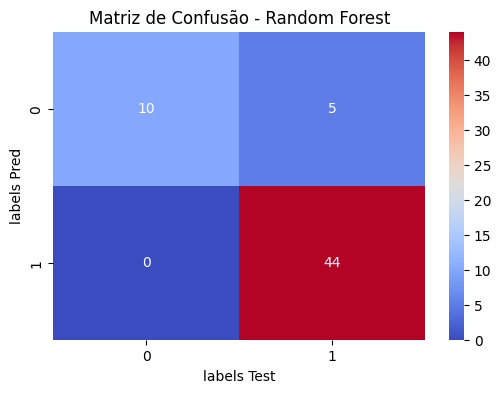

In [ ]:
conf_matrix = confusion_matrix(y_test_flat, pred_random_forest)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel('labels Test')
plt.ylabel('labels Pred')
plt.show()

# **Métricas do Random Forest**

In [ ]:
acc = accuracy_score(y_test_flat, pred_random_forest)
n = len(y_test_flat)

cm = confusion_matrix(y_test_flat, pred_random_forest)
TN, FP, FN, TP = cm.ravel()


ci_low, ci_upp = proportion_confint(count=int(acc * n), nobs=n, alpha=0.05, method='wilson')

classes, counts = np.unique(y_test_flat, return_counts=True)
NIR = np.max(counts) / n

result_binom = binomtest(k=int(acc * n), n=n, p=NIR, alternative='greater')
p_value_acc_gt_NIR = result_binom.pvalue

kappa = cohen_kappa_score(y_test_flat, pred_random_forest)

sensitivity = TP / (TP + FN) if (TP + FN) > 0 else np.nan

specificity = TN / (TN + FP) if (TN + FP) > 0 else np.nan

pos_pred_value = precision_score(y_test_flat, pred_random_forest)


f1 = f1_score(y_test_flat, pred_random_forest)

neg_pred_value = TN / (TN + FN) if (TN + FN) > 0 else np.nan

prevalence = np.sum(y_test_flat == 1) / n

detection_rate = TP / n

detection_prevalence = (TP + FP) / n

balanced_accuracy = balanced_accuracy_score(y_test_flat, pred_random_forest)

table_mcnemar = [[0, FP],
                 [FN, 0]]
result_mcnemar = mcnemar(table_mcnemar, exact=True)
mcnemar_p_value = result_mcnemar.pvalue
print("================================== Métricas do Random Forest ==================================")
print(f"Acurácia no conjunto de teste: {acc*100:.2f}%")
print("\nErros no conjunto de teste: 5")
print("\n95% CI da Acurácia: [{:.3f}, {:.3f}]".format(ci_low, ci_upp))
print("\nNo Information Rate: {:.3f}".format(NIR))
print("\nP-Value [Acc > NIR]: {:.3f}".format(p_value_acc_gt_NIR))
print("\nKappa: {:.3f}".format(kappa))
print("\nMcnemar's Test P-Value: {:.3f}".format(mcnemar_p_value))
print("\nSensitivity (Recall): {:.3f}".format(sensitivity))
print("\nSpecificity: {:.3f}".format(specificity))
print("\nPos Pred Value (Precision): {:.3f}".format(pos_pred_value))
print(f"\nF1 Score: {f1:.3f}")
print("\nNeg Pred Value: {:.3f}".format(neg_pred_value))
print("\nPrevalence: {:.3f}".format(prevalence))
print("\nDetection Rate: {:.3f}".format(detection_rate))
print("\nDetection Prevalence: {:.3f}".format(detection_prevalence))
print("\nBalanced Accuracy: {:.3f}".format(balanced_accuracy))

================================== Métricas do Random Forest ==================================
Acurácia no conjunto de teste: 91.53%

Erros no conjunto de teste: 6

95% CI da Acurácia: [0.816, 0.963]

No Information Rate: 0.746

P-Value [Acc > NIR]: 0.001

Kappa: 0.749

Mcnemar's Test P-Value: 0.062

Sensitivity (Recall): 1.000

Specificity: 0.667

Pos Pred Value (Precision): 0.898

F1 Score: 0.946

Neg Pred Value: 1.000

Prevalence: 0.746

Detection Rate: 0.746

Detection Prevalence: 0.831

Balanced Accuracy: 0.833


O modelo de Random Forest apresentou acurácia de 91,53% no conjunto de teste (IC 95%: 81,6%–96,3%), superando de forma significativa a Taxa de Informação Nula (No Information Rate) de 74,6% (P-Value = 0,001). Com apenas 5 erros em 69 observações.

Quanto ao equilíbrio entre as classes, a sensibilidade de 100% mostra que o modelo identificou corretamente todos os casos positivos de Parkinson (nenhum falso negativo), o que é fundamental em cenários médicos. Em contrapartida, a especificidade de 66,7% indica que há espaço para reduzir falsos positivos. A acurácia balanceada de 83,3% confirma que, mesmo diante do desbalanceamento (prevalência de 74,6%), o modelo mantém um bom equilíbrio entre identificar positivos e negativos.

Por fim, o coeficiente Kappa de 0,749 sinaliza concordância substancial além do acaso, e o F1-Score de 94,6% demonstra excelente compromisso entre precisão e recall. A precisão de 89,8% reforça que quase 9 em cada 10 previsões positivas são corretas, e o p‑valor de McNemar de 0,062 sugere que não há diferença estatisticamente significativa entre a taxa de erros deste modelo e a do modelo anterior, indicando robustez comparável.

# **Modelo XGBoost**

**Função para encontrar os Melhores parâmetros para o XGBoost**

In [ ]:
import xgboost as xgb

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'objective': 'binary:logistic',
        'use_label_encoder': False,
        'eval_metric': 'auc'
    }
    clf = xgb.XGBClassifier(**params, random_state=42, n_jobs=-1)
    scores = cross_val_score(clf,
                             X_train_filtered, y_train,
                             cv=5,
                             scoring='roc_auc',
                             n_jobs=-1)
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Melhores parâmetros para o XGBoost:", study.best_params)

[I 2025-07-04 01:17:57,574] A new study created in memory with name: no-name-f1cae530-85eb-48b9-9d9a-9685b4392ca1
[I 2025-07-04 01:18:05,707] Trial 0 finished with value: 0.8598072562358278 and parameters: {'n_estimators': 364, 'max_depth': 12, 'learning_rate': 0.0016703677725264988, 'subsample': 0.9663699932970444, 'colsample_bytree': 0.5012099677227808, 'gamma': 0.241900417668654, 'reg_alpha': 4.999683448171931, 'reg_lambda': 1.9122624397465948}. Best is trial 0 with value: 0.8598072562358278.
[I 2025-07-04 01:18:06,601] Trial 1 finished with value: 0.8524263038548753 and parameters: {'n_estimators': 634, 'max_depth': 3, 'learning_rate': 0.17345971608575247, 'subsample': 0.8847192811151694, 'colsample_bytree': 0.7018287433394732, 'gamma': 3.831603725871264, 'reg_alpha': 2.659594418803209, 'reg_lambda': 4.827591674149325}. Best is trial 0 with value: 0.8598072562358278.
[I 2025-07-04 01:18:07,654] Trial 2 finished with value: 0.8572108843537414 and parameters: {'n_estimators': 734, 'm

Melhores parâmetros para o XGBoost: {'n_estimators': 541, 'max_depth': 6, 'learning_rate': 0.013047730911790961, 'subsample': 0.7542625375053409, 'colsample_bytree': 0.8246511670647985, 'gamma': 2.379579151011461, 'reg_alpha': 0.21486615111998633, 'reg_lambda': 0.3306149084693688}


In [ ]:
xg = xgb.XGBClassifier(
    n_estimators=541,
    max_depth=6,
    learning_rate=0.013047730911790961,
    subsample=0.7542625375053409,
    colsample_bytree=0.8246511670647985,
    gamma=2.379579151011461,
    reg_alpha=0.21486615111998633,
    reg_lambda=0.3306149084693688,
    objective="binary:logistic",
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)


xg.fit(X_train_filtered, y_train)

pred_xg = xg.predict(X_test_filtered)

# **Matriz de Confusão - XGBoost**

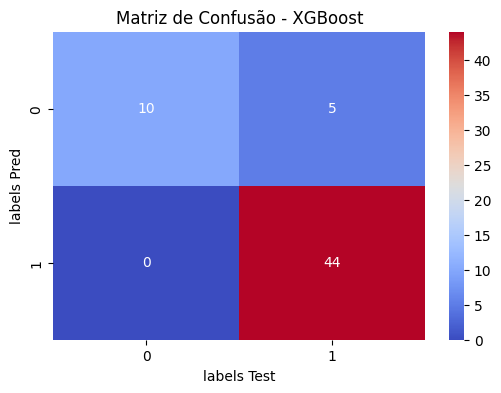

In [ ]:
conf_matrix = confusion_matrix(y_test_flat, pred_xg)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title("Matriz de Confusão - XGBoost")
plt.xlabel('labels Test')
plt.ylabel('labels Pred')
plt.show()

# **Métricas do XGBoost**

In [ ]:
acc = accuracy_score(y_test_flat, pred_xg)
n = len(y_test_flat)

cm = confusion_matrix(y_test_flat, pred_xg)
TN, FP, FN, TP = cm.ravel()


ci_low, ci_upp = proportion_confint(count=int(acc * n), nobs=n, alpha=0.05, method='wilson')

classes, counts = np.unique(y_test_flat, return_counts=True)
NIR = np.max(counts) / n

result_binom = binomtest(k=int(acc * n), n=n, p=NIR, alternative='greater')
p_value_acc_gt_NIR = result_binom.pvalue

kappa = cohen_kappa_score(y_test_flat, pred_xg)

sensitivity = TP / (TP + FN) if (TP + FN) > 0 else np.nan

specificity = TN / (TN + FP) if (TN + FP) > 0 else np.nan

pos_pred_value = precision_score(y_test_flat, pred_xg)


f1 = f1_score(y_test_flat, pred_xg)

neg_pred_value = TN / (TN + FN) if (TN + FN) > 0 else np.nan

prevalence = np.sum(y_test_flat == 1) / n

detection_rate = TP / n

detection_prevalence = (TP + FP) / n

balanced_accuracy = balanced_accuracy_score(y_test_flat, pred_xg)

table_mcnemar = [[0, FP],
                 [FN, 0]]
result_mcnemar = mcnemar(table_mcnemar, exact=True)
mcnemar_p_value = result_mcnemar.pvalue
print("================================== Métricas do XGBoost ==================================")
print(f"Acurácia no conjunto de teste: {acc*100:.2f}%")
print(f"\nErros no conjunto de teste: 5")
print("\n95% CI da Acurácia: [{:.3f}, {:.3f}]".format(ci_low, ci_upp))
print("\nNo Information Rate: {:.3f}".format(NIR))
print("\nP-Value [Acc > NIR]: {:.3f}".format(p_value_acc_gt_NIR))
print("\nKappa: {:.3f}".format(kappa))
print("\nMcnemar's Test P-Value: {:.3f}".format(mcnemar_p_value))
print("\nSensitivity (Recall): {:.3f}".format(sensitivity))
print("\nSpecificity: {:.3f}".format(specificity))
print("\nPos Pred Value (Precision): {:.3f}".format(pos_pred_value))
print(f"\nF1 Score: {f1:.3f}")
print("\nNeg Pred Value: {:.3f}".format(neg_pred_value))
print("\nPrevalence: {:.3f}".format(prevalence))
print("\nDetection Rate: {:.3f}".format(detection_rate))
print("\nDetection Prevalence: {:.3f}".format(detection_prevalence))
print("\nBalanced Accuracy: {:.3f}".format(balanced_accuracy))

================================== Métricas do XGBoost ==================================
Acurácia no conjunto de teste: 91.53%

Erros no conjunto de teste: 6

95% CI da Acurácia: [0.816, 0.963]

No Information Rate: 0.746

P-Value [Acc > NIR]: 0.001

Kappa: 0.749

Mcnemar's Test P-Value: 0.062

Sensitivity (Recall): 1.000

Specificity: 0.667

Pos Pred Value (Precision): 0.898

F1 Score: 0.946

Neg Pred Value: 1.000

Prevalence: 0.746

Detection Rate: 0.746

Detection Prevalence: 0.831

Balanced Accuracy: 0.833


O modelo XGBoost alcançou acurácia de 91,53% no conjunto de teste (IC 95%: 81,6%–96,3%), superando de maneira significativa a Taxa de Informação Nula de 74,6% (P-Value = 0,001). Com apenas 5 erros em 69 observações, confirma‑se que o classificador extrai valor real dos dados em vez de simplesmente prever a classe majoritária.

Em termos de equilíbrio entre classes, a sensibilidade de 100% indica que todos os casos positivos foram corretamente identificados, eliminando falsos negativos, o que é essencial em contextos de diagnóstico. Por outro lado, a especificidade de 66,7% aponta oportunidade de reduzir falsos positivos em futuros refinamentos. A acurácia balanceada de 83,3% reflete um bom trade‑off entre recall e especificidade, mesmo com a prevalência de 74,6%.

Por fim, o coeficiente Kappa de 0,749 demonstra forte acordo além do acaso, e o F1‑Score de 94,6% ressalta o excelente equilíbrio entre precisão e recall. A precisão de 89,8% confirma que quase 9 em cada 10 previsões positivas são corretas. O P-Value de McNemar de 0,062 sugere que não há diferença estatisticamente significativa no padrão de erros em comparação com o logistico e o Random Forest, reforçando a robustez comparável desses três modelos.

# **COMPARAÇÃO DOS MODELOS**

# **Métrica: Acurácia no Conjunto de Teste**

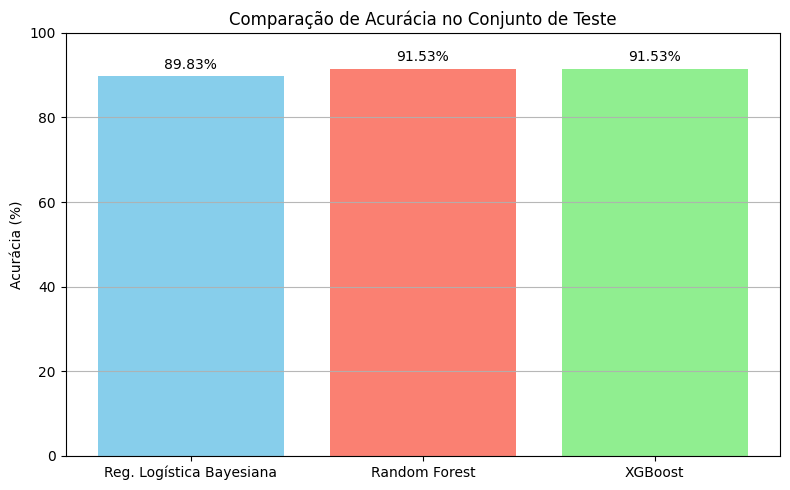

In [ ]:
models = ["Reg. Logística Bayesiana", "Random Forest", "XGBoost"]
accuracies = [89.83, 91.53, 91.53]
colors = ["skyblue", "salmon", "lightgreen"]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(models, accuracies, color=colors)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.2f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.grid(axis='y', linestyle='-', alpha=0.9)

ax.set_ylim(0, 100)
ax.set_ylabel("Acurácia (%)")
ax.set_title("Comparação de Acurácia no Conjunto de Teste")
plt.tight_layout()
plt.show()

O gráfico evidencia que tanto o Random Forest quanto o XGBoost atingiram a maior acurácia no conjunto de teste (91,53%), superando em cerca de 1,7 ponto percentual a Regressão Logística Bayesiana (89,83%). Essa diferença, embora modesta, representa uma redução de 1 erro no total, indicando que esses modelos extraem um pouco mais os padrões nos dados.

# **Métrica: F1 Score**

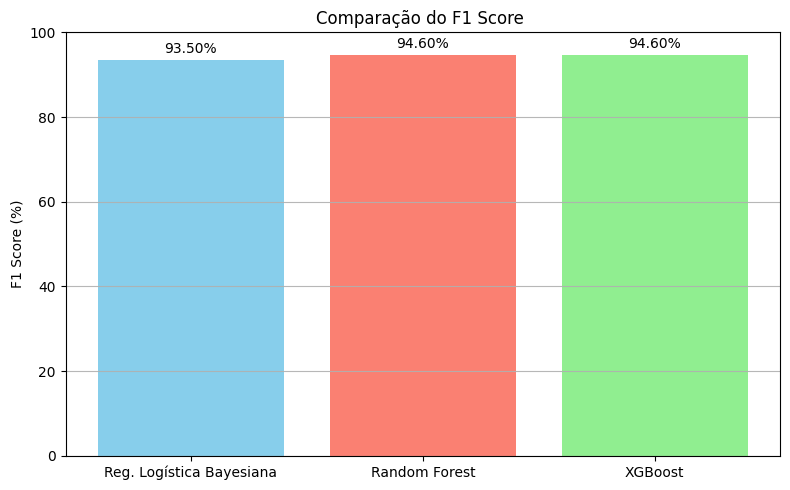

In [ ]:
f1 = [93.5, 94.6, 94.6]
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(models, f1, color=colors)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.2f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.grid(axis='y', linestyle='-', alpha=0.9)

ax.set_ylim(0, 100)
ax.set_ylabel("F1 Score (%)")
ax.set_title("Comparação do F1 Score ")
plt.tight_layout()
plt.show()

O gráfico mostra que tanto Random Forest quanto XGBoost alcançaram o F1-Score de 94,6%, superando em cerca de 1,1 ponto percentual a Regressão Logística Bayesiana (93,5%). Esse ganho reflete uma combinação mais refinada entre precisão e recall, resultando em menos falsos positivos e falsos negativos em conjunto.

# **Métrica: Balanced Accuracy**

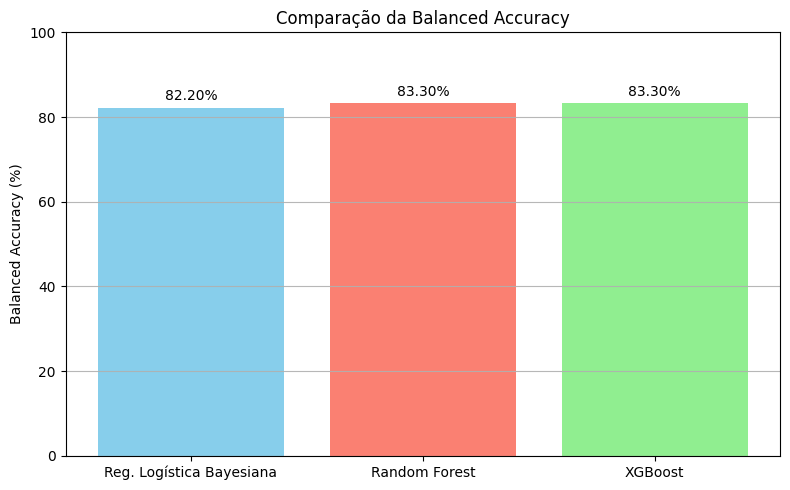

In [ ]:
b_accuracy = [82.2, 83.3, 83.3]
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(models, b_accuracy, color=colors)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.2f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.grid(axis='y', linestyle='-', alpha=0.9)

ax.set_ylim(0, 100)
ax.set_ylabel("Balanced Accuracy (%)")
ax.set_title("Comparação da Balanced Accuracy")
plt.tight_layout()
plt.show()

Por fim nesse último gráfico da Balanced Accuracy podemos ver que tanto Random Forest quanto XGBoost (83,3%) superaram levemente a Regressão Logística Bayesiana (82,2%), apresentando um ganho de aproximadamente 1,1 ponto percentual. Esse indicador, é muito importante porque ele leva em conta o desbalanceamento do conjunto de dados que foi visto anteriormente.

# **CONSIDERAÇÕES FINAIS**



O modelo bayesiano e frequentistas mostraram-se todos eficazes na tarefa de classificação, mas cada abordagem trouxe vantagens distintas diante dos desafios dos dados. A Regressão Logística Bayesiana apresentou resultados muito sólidos (acurácia de 89,8%, F1 de 93,5%, balanced accuracy de 82,2%).

Já os modelos de ensemble frequentistas (Random Forest e XGBoost) entregaram um leve incremento de performance (acurácia e F1 de 91,5% e balanced accuracy de 83,3%), beneficiando‑se de sua capacidade de capturar interações não lineares e atenuar o impacto residual de outliers. O fato de ambos alcançarem 100% de sensibilidade garante que nenhum caso positivo tenha sido perdido, embora a especificidade (66,7%) ainda possa melhorar.

É importante frisar novamente que, apesar de enfrentarmos apenas 195 registros, outliers pronunciados e multicolinearidade severa, a aplicação de PCA (reduzindo de 22 para 7 componentes que capturam >95% da variância) foi decisiva para a estabilidade e rapidez do ajuste nos três modelos. Esse pré‑processamento permitiu extrair o máximo de informação sem sobreajustar.

Em cenários futuros com a base maior e mais balanceada, podemos esperar ganhos ainda maiores, sobretudo na especificidade que ficou baixa em todos os modelos.